In [2415]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
from math import factorial as ft 
import plotly.express as px
plt.style.use('ggplot')

In [2416]:
county_data = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/housing-data-study/NewYork_DemographicsByCounty_sample.xlsx - 2022AmericanCommunitySurvey.csv', encoding = "utf-8")
HIC_COC_data = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/housing-data-study/2007-2023-HIC-Counts-by-CoC.xlsx - 2023.csv', encoding = "utf-8")
HIC_state_data = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/housing-data-study/2023-HIC-Counts-by-State.csv', encoding = "utf-8")
PIT_state_data = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/housing-data-study/2007-2023-PIT-Counts-by-State (1).csv', encoding = "utf-8")
PIT_COC_data = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/housing-data-study/PIT counts 2023.csv', encoding='utf-8')


<h1>Top 15 Counties (Including NYC)</h1>

In [2417]:
display(county_data.head(10))

,Unnamed: 0,Most Current Population Year,Population
0,New York,2022,"19,994,379"
1,Albany County,2022,"315,041"
2,Allegany County,2022,"47,222"
3,Bronx County,2022,"1,443,229"
4,Broome County,2022,"198,365"
5,Cattaraugus County,2022,"77,000"
6,Cayuga County,2022,"76,171"
7,Chautauqua County,2022,"127,440"
8,Chemung County,2022,"83,584"
9,Chenango County,2022,"47,096"


In [2418]:
county_data = county_data.rename(columns={'Unnamed: 0': 'county_name', 'Population': 'population'})

In [2419]:
display(county_data.head(10))
county_data['population'] = county_data['population'].apply(lambda x: str(x).replace(',', ''))

county_data['population'] = county_data['population'].astype(int)

,county_name,Most Current Population Year,population
0,New York,2022,"19,994,379"
1,Albany County,2022,"315,041"
2,Allegany County,2022,"47,222"
3,Bronx County,2022,"1,443,229"
4,Broome County,2022,"198,365"
5,Cattaraugus County,2022,"77,000"
6,Cayuga County,2022,"76,171"
7,Chautauqua County,2022,"127,440"
8,Chemung County,2022,"83,584"
9,Chenango County,2022,"47,096"


In [2420]:
top_counties = county_data.groupby('county_name')['population'].sum().reset_index().rename(columns={0: 'population', 'county_name': 'county_name'}).sort_values(by='population', ascending=False)
#display(top_counties)
#top_counties.info()
top_fifteen_counties = top_counties.head(16)
display(top_fifteen_counties)

,county_name,population
30,New York,19994379
23,Kings County,2679620
41,Queens County,2360826
31,New York County,1645867
52,Suffolk County,1524486
2,Bronx County,1443229
29,Nassau County,1389160
60,Westchester County,997904
14,Erie County,951232
27,Monroe County,756406


<H1>Beds Available Data</H1>

<H3>Continuum of Care Information</H3>

In [2421]:
#display(HIC_COC_data).sample(5)
#HIC_COC_data.info()


In [2422]:
HIC_COC_data = HIC_COC_data.rename(columns={'CoC Number': 'coc_number'})
PIT_COC_data = PIT_COC_data.rename(columns={'CoC Number': 'coc_number'})
PIT_COC_data = PIT_COC_data.rename(columns={'CoC Name': 'coc_name'})

In [2423]:
NY_COC_HIC = []
NY_COC_HIC = HIC_COC_data.query("coc_number.str.contains('NY')").reset_index()

In [2424]:
display(NY_COC_HIC.sample(5))

,index,coc_number,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)",...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
9,263,NY-513,457,417,395,86.43%,334,123,0,72,...,0,0,0,NaN,0,0,0,0,0,0
23,277,NY-608,89,72,71,79.78%,77,12,0,13,...,36,36,36,100.00%,4,16,20,0,0,0
7,261,NY-511,619,593,585,94.51%,558,61,0,50,...,39,39,39,100.00%,3,5,34,0,0,0
2,256,NY-503,473,443,210,44.40%,314,157,2,56,...,25,25,0,0.00%,2,5,20,0,0,0
12,266,NY-519,35,0,0,0.00%,23,12,0,12,...,0,0,0,NaN,0,0,0,0,0,0


In [2425]:
#display(HIC_state_data.sample(10))
#HIC_state_data.info()

<h3>State Information</h3>

In [2426]:
NY_state_HIC = []

NY_state_HIC = HIC_state_data.query("CocState.str.contains('NY')").reset_index()

In [2427]:
NY_state_HIC.sample(5)

,index,Row #,CocState,CoC,Coc_ID,HudNum,Status,year,Organization ID,Organization Name,...,Total Beds,Updated On,mergedDefunctYear,questionUsesDescriptorElements,questionDesiresToUseDescriptorElements,notes,projectNotes,sandyRelated,sandyRelatedNote,HOPWAMedAssistedLivingFac
1106,20782,675555,NY,New York City CoC,1037,NY-600,Complete,2023,2322,Department of Homeless Services (NYC DHS),...,236,4/24/2023 20:07,NaN,1,NaN,NaN,NaN,0,NaN,NaN
1168,20844,675190,NY,New York City CoC,1037,NY-600,Complete,2023,2322,Department of Homeless Services (NYC DHS),...,333,4/24/2023 20:07,NaN,1,NaN,NaN,NaN,0,NaN,NaN
1044,20720,675207,NY,New York City CoC,1037,NY-600,Complete,2023,2322,Department of Homeless Services (NYC DHS),...,159,4/24/2023 20:07,NaN,1,NaN,NaN,NaN,0,NaN,NaN
1430,21106,675460,NY,New York City CoC,1037,NY-600,Complete,2023,2324,Department of Housing Preservation and Develop...,...,8,4/24/2023 20:07,NaN,1,NaN,NaN,NaN,0,NaN,NaN
1695,21371,676115,NY,New York City CoC,1037,NY-600,Complete,2023,5213,Project Hospitality,...,43,4/24/2023 20:07,NaN,1,NaN,NaN,NaN,0,NaN,NaN


In [2428]:
NY_state_columns = ['CocState', 'CoC', 'Coc_ID', 'HudNum', 'Organization ID', 'Organization Name', 'Project Name', 'Project Type', 'Bed Type', 'beginsOperationsWithinYear', 'housingType', 'address1', 'address2', 'city', 'state', 'zip', 'Beds HH w/ Children', 'Units HH w/ Children', 'Veteran Beds HH w/ Children', 'Youth Beds HH w/ Children', 'CH Beds HH w/ Children', 'Beds HH w/o Children', 'Veteran Beds HH w/o Children', 'Youth Beds HH w/o Children', 'CH Beds HH w/o Children', 'Beds HH w/ only Children', 'CH Beds HH w only Children', 'Year-Round Beds', 'DV Beds', 'Total Seasonal Beds', 'O/V Beds', 'PIT Count', 'Total Beds']

In [2429]:
NY_state_HIC = NY_state_HIC[NY_state_columns]

In [2430]:
NY_state_HIC.sample(5)

,CocState,CoC,Coc_ID,HudNum,Organization ID,Organization Name,Project Name,Project Type,Bed Type,beginsOperationsWithinYear,...,Youth Beds HH w/o Children,CH Beds HH w/o Children,Beds HH w/ only Children,CH Beds HH w only Children,Year-Round Beds,DV Beds,Total Seasonal Beds,O/V Beds,PIT Count,Total Beds
2105,NY,Poughkeepsie/Dutchess County CoC,1230,NY-601,3598,Hudson River Housing,HRH Gannett House,ES,F,NaN,...,0.0,NaN,0.0,NaN,89,NaN,0.0,0.0,89.0,89
1641,NY,New York City CoC,1037,NY-600,45757,New York City Housing Authority (NYCHA),NYCHA Emergency Housing Vouchers (EHV),OPH,NaN,NaN,...,0.0,NaN,0.0,NaN,5790,NaN,NaN,NaN,5790.0,5790
1906,NY,New York City CoC,1037,NY-600,13993,The Lantern Group,HMH Hall - DOHMH Single Adults S Plus C (10),PSH,NaN,NaN,...,0.0,10.0,0.0,0.0,10,NaN,NaN,NaN,10.0,10
263,NY,"Binghamton, Union Town/Broome, Otsego, Chenang...",1123,NY-511,10795,Volunteers of America,Adult Housing,PSH,NaN,NaN,...,0.0,15.0,NaN,NaN,52,NaN,NaN,NaN,52.0,52
978,NY,New York City CoC,1037,NY-600,13594,Comunilife Inc.,El Rio Residence,PSH,NaN,NaN,...,0.0,39.0,0.0,0.0,39,NaN,NaN,NaN,39.0,39


<h1>Point in Time Data</h1>

<h3>Continuum of Care Information</h3>

In [2431]:
display(PIT_COC_data.sample(5))

,coc_number,coc_name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
41,CA-523,"Colusa, Glenn, Trinity Counties CoC",Largely Rural CoC,Sheltered and Unsheltered Count,360.0,86.0,17.0,56.0,85.0,54.0,...,6.0,5.0,1.0,6.0,0.0,7.0,6.0,1.0,7.0,0.0
264,NY-514,"Jamestown, Dunkirk/Chautauqua County CoC",Largely Rural CoC,Sheltered and Unsheltered Count,136.0,40.0,16.0,29.0,28.0,17.0,...,2.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,0.0
262,NY-512,Troy/Rensselaer County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,156.0,44.0,15.0,34.0,30.0,11.0,...,6.0,3.0,3.0,6.0,0.0,6.0,3.0,3.0,6.0,0.0
230,NH-500,New Hampshire Balance of State CoC,Largely Rural CoC,Sheltered and Unsheltered Count,1555.0,245.0,111.0,286.0,369.0,245.0,...,18.0,13.0,4.0,17.0,1.0,21.0,16.0,4.0,20.0,1.0
362,VA-600,Arlington County CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,213.0,42.0,11.0,35.0,42.0,30.0,...,3.0,3.0,0.0,3.0,0.0,6.0,6.0,0.0,6.0,0.0


In [2432]:
PIT_COC_data.iloc[310, 7] = float(str(PIT_COC_data.iloc[310, 7]).replace('\n', ''))


In [2433]:
print(PIT_COC_data.iloc[310,7])

33.0


In [2434]:
PIT_COC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Columns: 645 entries, coc_number to Unsheltered Homeless Children of Parenting Youth
dtypes: float64(641), object(4)
memory usage: 1.9+ MB


In [2435]:
PIT_COC_columns = ['coc_number', 'coc_name', 'CoC Category', 'Count Types', 'Overall Homeless', 'Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless', 'Sheltered Total Homeless', 'Unsheltered Homeless', 'Overall Homeless Individuals', 'Sheltered ES Homeless Individuals', 'Sheltered TH Homeless Individuals', 'Sheltered SH Homeless Individuals', 'Sheltered Total Homeless Individuals', 'Unsheltered Homeless Individuals', 'Overall Homeless People in Families', 'Sheltered ES Homeless People in Families', 'Sheltered TH Homeless People in Families', 'Sheltered Total Homeless People in Families', 'Unsheltered Homeless People in Families', 'Overall Homeless Family Households', 'Sheltered ES Homeless Family Households', 'Sheltered TH Homeless Family Households', 'Sheltered Total Homeless Family Households', 'Unsheltered Homeless Family Households', 'Overall Chronically Homeless', 'Sheltered ES Chronically Homeless', 'Sheltered SH Chronically Homeless', 'Sheltered Total Chronically Homeless', 'Unsheltered Chronically Homeless', 'Overall Chronically Homeless Individuals', 'Sheltered ES Chronically Homeless Individuals', 'Sheltered SH Chronically Homeless Individuals', 'Sheltered Total Chronically Homeless Individuals', 'Unsheltered Chronically Homeless Individuals', 'Overall Chronically Homeless People in Families', 'Sheltered ES Chronically Homeless People in Families', 'Sheltered Total Chronically Homeless People in Families', 'Unsheltered Chronically Homeless People in Families']

In [2436]:
PIT_COC_data = PIT_COC_data[PIT_COC_columns]

In [2437]:
PIT_COC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 40 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   coc_number                                               387 non-null    object 
 1   coc_name                                                 386 non-null    object 
 2   CoC Category                                             385 non-null    object 
 3   Count Types                                              385 non-null    object 
 4   Overall Homeless                                         386 non-null    float64
 5   Sheltered ES Homeless                                    386 non-null    float64
 6   Sheltered TH Homeless                                    386 non-null    float64
 7   Sheltered SH Homeless                                    386 non-null    float64
 8   Sheltered Total Homeless      

In [2438]:
display(PIT_COC_data.head(5))

,coc_number,coc_name,CoC Category,Count Types,Overall Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered SH Homeless,Sheltered Total Homeless,Unsheltered Homeless,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered ES Chronically Homeless Individuals,Sheltered SH Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered ES Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families
0,AK-500,Anchorage CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,1760.0,1209.0,216.0,0.0,1425.0,335.0,...,54.0,475.0,421.0,0.0,421.0,54.0,13.0,13.0,13.0,0.0
1,AK-501,Alaska Balance of State CoC,Largely Rural CoC,Sheltered and Unsheltered Count,854.0,555.0,166.0,0.0,721.0,133.0,...,75.0,229.0,154.0,0.0,154.0,75.0,61.0,61.0,61.0,0.0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoC,Sheltered and Unsheltered Count,847.0,363.0,93.0,9.0,465.0,382.0,...,145.0,253.0,101.0,7.0,108.0,145.0,3.0,3.0,3.0,0.0
3,AL-501,Mobile City & County/Baldwin County CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,670.0,192.0,121.0,0.0,313.0,357.0,...,122.0,133.0,11.0,0.0,11.0,122.0,5.0,5.0,5.0,0.0
4,AL-502,Florence/Northwest Alabama CoC,Largely Rural CoC,Sheltered and Unsheltered Count,195.0,63.0,100.0,0.0,163.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2439]:
PIT_COC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 40 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   coc_number                                               387 non-null    object 
 1   coc_name                                                 386 non-null    object 
 2   CoC Category                                             385 non-null    object 
 3   Count Types                                              385 non-null    object 
 4   Overall Homeless                                         386 non-null    float64
 5   Sheltered ES Homeless                                    386 non-null    float64
 6   Sheltered TH Homeless                                    386 non-null    float64
 7   Sheltered SH Homeless                                    386 non-null    float64
 8   Sheltered Total Homeless      

In [2440]:
PIT_COC_data.fillna(0, inplace=True)

In [2441]:
PIT_COC_data = PIT_COC_data.astype({'coc_number': 'str', 'coc_name': 'str', 'CoC Category': 'str', 'Count Types': 'str', 'Overall Homeless': 'int', 'Sheltered ES Homeless': 'int', 'Sheltered TH Homeless': 'int', 'Sheltered SH Homeless': 'int', 'Sheltered Total Homeless': 'int', 'Unsheltered Homeless': 'int', 'Overall Homeless Individuals': 'int', 'Sheltered ES Homeless Individuals': 'int', 'Sheltered TH Homeless Individuals': 'int', 'Sheltered SH Homeless Individuals': 'int', 'Sheltered Total Homeless Individuals': 'int', 'Unsheltered Homeless Individuals': 'int', 'Overall Homeless People in Families': 'int', 'Sheltered ES Homeless People in Families': 'int', 'Sheltered TH Homeless People in Families': 'int', 'Sheltered Total Homeless People in Families': 'int', 'Unsheltered Homeless People in Families': 'int', 'Overall Homeless Family Households': 'int', 'Sheltered ES Homeless Family Households': 'int', 'Sheltered TH Homeless Family Households': 'int', 'Sheltered Total Homeless Family Households': 'int', 'Unsheltered Homeless Family Households': 'int', 'Overall Chronically Homeless': 'int', 'Sheltered ES Chronically Homeless': 'int', 'Sheltered SH Chronically Homeless': 'int', 'Sheltered Total Chronically Homeless': 'int', 'Unsheltered Chronically Homeless': 'int', 'Overall Chronically Homeless Individuals': 'int', 'Sheltered ES Chronically Homeless Individuals': 'int', 'Sheltered SH Chronically Homeless Individuals': 'int', 'Sheltered Total Chronically Homeless Individuals': 'int', 'Unsheltered Chronically Homeless Individuals': 'int', 'Overall Chronically Homeless People in Families': 'int', 'Sheltered ES Chronically Homeless People in Families': 'int', 'Sheltered Total Chronically Homeless People in Families': 'int', 'Unsheltered Chronically Homeless People in Families': 'int'})

In [2442]:
PIT_COC_NY_data = PIT_COC_data[PIT_COC_data['coc_number'].str.contains('NY')]

In [2443]:
PIT_COC_NY_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 254 to 277
Data columns (total 40 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   coc_number                                               24 non-null     object
 1   coc_name                                                 24 non-null     object
 2   CoC Category                                             24 non-null     object
 3   Count Types                                              24 non-null     object
 4   Overall Homeless                                         24 non-null     int64 
 5   Sheltered ES Homeless                                    24 non-null     int64 
 6   Sheltered TH Homeless                                    24 non-null     int64 
 7   Sheltered SH Homeless                                    24 non-null     int64 
 8   Sheltered Total Homeless                    

In [2444]:
display(PIT_COC_NY_data)

,coc_number,coc_name,CoC Category,Count Types,Overall Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered SH Homeless,Sheltered Total Homeless,Unsheltered Homeless,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered ES Chronically Homeless Individuals,Sheltered SH Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered ES Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families
254,NY-500,"Rochester, Irondequoit, Greece/Monroe County CoC",Largely Suburban CoC,Sheltered and Unsheltered Count,803,642,108,11,761,42,...,17,88,68,3,71,17,7,7,7,0
255,NY-501,"Elmira/Steuben, Allegany, Livingston, Chemung,...",Largely Rural CoC,Sheltered and Unsheltered Count,594,535,40,0,575,19,...,2,15,13,0,13,2,2,2,2,0
256,NY-503,Albany City & County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,889,661,127,0,788,101,...,60,90,30,0,30,60,6,6,6,0
257,NY-505,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",Largely Suburban CoC,Sheltered and Unsheltered Count,924,778,117,0,895,29,...,12,53,41,0,41,12,8,8,8,0
258,NY-507,Schenectady City & County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,430,339,84,0,423,7,...,1,23,22,0,22,1,3,3,3,0
259,NY-508,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",Largely Suburban CoC,Sheltered and Unsheltered Count,1560,1147,382,0,1529,31,...,10,84,74,0,74,10,8,8,8,0
260,NY-510,Ithaca/Tompkins County CoC,Largely Rural CoC,Sheltered and Unsheltered Count,273,221,41,0,262,11,...,3,65,62,0,62,3,2,2,2,0
261,NY-511,"Binghamton, Union Town/Broome, Otsego, Chenang...",Largely Rural CoC,Sheltered and Unsheltered Count,676,562,37,0,599,77,...,7,8,1,0,1,7,0,0,0,0
262,NY-512,Troy/Rensselaer County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,156,105,28,0,133,23,...,16,18,2,0,2,16,0,0,0,0
263,NY-513,"Wayne, Ontario, Seneca, Yates Counties CoC",Largely Rural CoC,Sheltered and Unsheltered Count,426,330,95,0,425,1,...,1,19,18,0,18,1,0,0,0,0


<h3>State Information</h3>

In [2445]:
display(PIT_state_data.sample(5))

,State,Number of CoCs,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,Overall Homeless - Age 55 to 64,Overall Homeless - Over 64,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
54,WV,4.0,"1,416",125,136,295,371,289,140,60,...,5,5,0,5,0,8,8,0,8,0
27,MP,0.0,,,,,,,,,...,,,,,,,,,,
52,WA,6.0,"28,036","4,386","1,897","3,542","4,352","3,251","2,931","1,199",...,162,67,82,149,13,208,91,101,192,16
41,PA,16.0,"12,556","2,669",957,"2,107","2,311","1,900","1,931",681,...,209,116,93,209,0,252,134,118,252,0
18,KS,5.0,"2,636",435,153,467,610,466,414,91,...,20,14,4,18,2,31,22,7,29,2


In [2446]:
PIT_state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Columns: 643 entries, State to Unsheltered Homeless Children of Parenting Youth
dtypes: float64(1), object(642)
memory usage: 296.5+ KB


In [2447]:
PIT_state_columns = ['State', 'Number of CoCs', 'Overall Homeless', 'Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless', 'Sheltered Total Homeless', 'Unsheltered Homeless', 'Overall Homeless Individuals', 'Sheltered ES Homeless Individuals', 'Sheltered TH Homeless Individuals', 'Sheltered SH Homeless Individuals', 'Sheltered Total Homeless Individuals', 'Unsheltered Homeless Individuals', 'Overall Homeless People in Families', 'Sheltered ES Homeless People in Families', 'Sheltered TH Homeless People in Families', 'Sheltered Total Homeless People in Families', 'Unsheltered Homeless People in Families', 'Overall Homeless Family Households', 'Sheltered ES Homeless Family Households', 'Sheltered TH Homeless Family Households', 'Sheltered Total Homeless Family Households', 'Unsheltered Homeless Family Households', 'Overall Chronically Homeless', 'Sheltered ES Chronically Homeless', 'Sheltered SH Chronically Homeless', 'Sheltered Total Chronically Homeless', 'Unsheltered Chronically Homeless', 'Overall Chronically Homeless Individuals', 'Sheltered ES Chronically Homeless Individuals', 'Sheltered SH Chronically Homeless Individuals', 'Sheltered Total Chronically Homeless Individuals', 'Unsheltered Chronically Homeless Individuals', 'Overall Chronically Homeless People in Families', 'Sheltered ES Chronically Homeless People in Families', 'Sheltered Total Chronically Homeless People in Families', 'Unsheltered Chronically Homeless People in Families']

In [2448]:
PIT_state_data = PIT_state_data[PIT_state_columns]

In [2449]:
PIT_state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 38 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   State                                                    58 non-null     object 
 1   Number of CoCs                                           57 non-null     float64
 2   Overall Homeless                                         57 non-null     object 
 3   Sheltered ES Homeless                                    57 non-null     object 
 4   Sheltered TH Homeless                                    57 non-null     object 
 5   Sheltered SH Homeless                                    57 non-null     object 
 6   Sheltered Total Homeless                                 57 non-null     object 
 7   Unsheltered Homeless                                     57 non-null     object 
 8   Overall Homeless Individuals    

<h1>Slicing PIT State Data</h1>

In [2450]:
PIT_NY_data = PIT_state_data.query("State == 'NY'")

In [2451]:
PIT_NY_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 37 to 37
Data columns (total 38 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   State                                                    1 non-null      object 
 1   Number of CoCs                                           1 non-null      float64
 2   Overall Homeless                                         1 non-null      object 
 3   Sheltered ES Homeless                                    1 non-null      object 
 4   Sheltered TH Homeless                                    1 non-null      object 
 5   Sheltered SH Homeless                                    1 non-null      object 
 6   Sheltered Total Homeless                                 1 non-null      object 
 7   Unsheltered Homeless                                     1 non-null      object 
 8   Overall Homeless Individuals         

In [2452]:
display(PIT_NY_data)

,State,Number of CoCs,Overall Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered SH Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered ES Homeless Individuals,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered ES Chronically Homeless Individuals,Sheltered SH Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered ES Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families
37,NY,24.0,"103,200","93,664","4,463",66,"98,193","5,007","49,505","40,993",...,"1,194","5,674","4,470",13,"4,483","1,191",458,455,455,3


In [2453]:
PIT_NY_data.iloc[0, 2:37] = PIT_NY_data.iloc[0, 2:37].apply(lambda x: str(x).replace(',', ''))


In [2454]:
#columns_for_int = ['Number of CoCs', 'Overall Homeless', 'Sheltered ES Homeless', 'Sheltered TH Homeless', 'Sheltered SH Homeless', 'Sheltered Total Homeless', 'Unsheltered Homeless', 'Overall Homeless Individuals', 'Sheltered ES Homeless Individuals', 'Sheltered TH Homeless Individuals', 'Sheltered SH Homeless Individuals', 'Sheltered Total Homeless Individuals', 'Unsheltered Homeless Individuals', 'Overall Homeless People in Families', 'Sheltered ES Homeless People in Families', 'Sheltered TH Homeless People in Families', 'Sheltered Total Homeless People in Families', 'Unsheltered Homeless People in Families', 'Overall Homeless Family Households', 'Sheltered ES Homeless Family Households', 'Sheltered TH Homeless Family Households', 'Sheltered Total Homeless Family Households', 'Unsheltered Homeless Family Households', 'Overall Chronically Homeless', 'Sheltered ES Chronically Homeless', 'Sheltered SH Chronically Homeless', 'Sheltered Total Chronically Homeless', 'Unsheltered Chronically Homeless', 'Overall Chronically Homeless Individuals', 'Sheltered ES Chronically Homeless Individuals', 'Sheltered SH Chronically Homeless Individuals', 'Sheltered Total Chronically Homeless Individuals', 'Unsheltered Chronically Homeless Individuals', 'Overall Chronically Homeless People in Families', 'Sheltered ES Chronically Homeless People in Families', 'Sheltered Total Chronically Homeless People in Families', 'Unsheltered Chronically Homeless People in Families']

PIT_NY_data = PIT_NY_data.astype({'State': 'object', 'Number of CoCs': 'int', 'Overall Homeless': 'int', 'Sheltered ES Homeless': 'int', 'Sheltered TH Homeless': 'int', 'Sheltered SH Homeless': 'int', 'Sheltered Total Homeless': 'int', 'Unsheltered Homeless': 'int', 'Overall Homeless Individuals': 'int', 'Sheltered ES Homeless Individuals': 'int', 'Sheltered TH Homeless Individuals': 'int', 'Sheltered SH Homeless Individuals': 'int', 'Sheltered Total Homeless Individuals': 'int', 'Unsheltered Homeless Individuals': 'int', 'Overall Homeless People in Families': 'int', 'Sheltered ES Homeless People in Families': 'int', 'Sheltered TH Homeless People in Families': 'int', 'Sheltered Total Homeless People in Families': 'int', 'Unsheltered Homeless People in Families': 'int', 'Overall Homeless Family Households': 'int', 'Sheltered ES Homeless Family Households': 'int', 'Sheltered TH Homeless Family Households': 'int', 'Sheltered Total Homeless Family Households': 'int', 'Unsheltered Homeless Family Households': 'int', 'Overall Chronically Homeless': 'int', 'Sheltered ES Chronically Homeless': 'int', 'Sheltered SH Chronically Homeless': 'int', 'Sheltered Total Chronically Homeless': 'int', 'Unsheltered Chronically Homeless': 'int', 'Overall Chronically Homeless Individuals': 'int', 'Sheltered ES Chronically Homeless Individuals': 'int', 'Sheltered SH Chronically Homeless Individuals': 'int', 'Sheltered Total Chronically Homeless Individuals': 'int', 'Unsheltered Chronically Homeless Individuals': 'int', 'Overall Chronically Homeless People in Families': 'int', 'Sheltered ES Chronically Homeless People in Families': 'int', 'Sheltered Total Chronically Homeless People in Families': 'int', 'Unsheltered Chronically Homeless People in Families': 'int'})


In [2455]:
display(PIT_NY_data)

,State,Number of CoCs,Overall Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered SH Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered ES Homeless Individuals,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered ES Chronically Homeless Individuals,Sheltered SH Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered ES Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families
37,NY,24,103200,93664,4463,66,98193,5007,49505,40993,...,1194,5674,4470,13,4483,1191,458,455,455,3


In [2456]:
PIT_NY_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 37 to 37
Data columns (total 38 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   State                                                    1 non-null      object
 1   Number of CoCs                                           1 non-null      int64 
 2   Overall Homeless                                         1 non-null      int64 
 3   Sheltered ES Homeless                                    1 non-null      int64 
 4   Sheltered TH Homeless                                    1 non-null      int64 
 5   Sheltered SH Homeless                                    1 non-null      int64 
 6   Sheltered Total Homeless                                 1 non-null      int64 
 7   Unsheltered Homeless                                     1 non-null      int64 
 8   Overall Homeless Individuals                   

<h1>Slicing PIT Continuum of Care Data</h1>

In [2457]:
PIT_COC_county_data = PIT_COC_NY_data.query("coc_name.str.contains('Suffolk') or coc_name.str.contains('Nassau') or coc_name.str.contains('Westchester') or coc_name.str.contains('Erie') or coc_name.str.contains('Monroe') or coc_name.str.contains('Onondaga') or coc_name.str.contains('Orange') or coc_name.str.contains('Rockland') or coc_name.str.contains('Albany') or coc_name.str.contains('Dutchess')").reset_index()


In [2458]:
PIT_COC_county_data.drop(['index'], axis=1, inplace=True)

In [2459]:
display(PIT_COC_county_data)

,coc_number,coc_name,CoC Category,Count Types,Overall Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered SH Homeless,Sheltered Total Homeless,Unsheltered Homeless,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered ES Chronically Homeless Individuals,Sheltered SH Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered ES Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families
0,NY-500,"Rochester, Irondequoit, Greece/Monroe County CoC",Largely Suburban CoC,Sheltered and Unsheltered Count,803,642,108,11,761,42,...,17,88,68,3,71,17,7,7,7,0
1,NY-503,Albany City & County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,889,661,127,0,788,101,...,60,90,30,0,30,60,6,6,6,0
2,NY-505,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",Largely Suburban CoC,Sheltered and Unsheltered Count,924,778,117,0,895,29,...,12,53,41,0,41,12,8,8,8,0
3,NY-508,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",Largely Suburban CoC,Sheltered and Unsheltered Count,1560,1147,382,0,1529,31,...,10,84,74,0,74,10,8,8,8,0
4,NY-601,Poughkeepsie/Dutchess County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,691,535,137,0,672,19,...,11,74,63,0,63,11,6,6,6,0
5,NY-602,"Newburgh, Middletown/Orange County CoC",Largely Suburban CoC,Sheltered and Unsheltered Count,491,385,41,0,426,65,...,43,59,16,0,16,43,3,3,3,0
6,NY-603,"Nassau, Suffolk Counties CoC",Largely Suburban CoC,Sheltered and Unsheltered Count,3536,3231,90,16,3337,199,...,53,90,37,0,37,53,21,21,21,0
7,NY-604,"Yonkers, Mount Vernon/Westchester County CoC",Largely Suburban CoC,Sheltered and Unsheltered Count,1317,1025,235,0,1260,57,...,12,88,76,0,76,12,9,9,9,0
8,NY-606,Rockland County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,157,102,12,0,114,43,...,24,39,15,0,15,24,0,0,0,0


In [2460]:
PIT_COC_county_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 40 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   coc_number                                               9 non-null      object
 1   coc_name                                                 9 non-null      object
 2   CoC Category                                             9 non-null      object
 3   Count Types                                              9 non-null      object
 4   Overall Homeless                                         9 non-null      int64 
 5   Sheltered ES Homeless                                    9 non-null      int64 
 6   Sheltered TH Homeless                                    9 non-null      int64 
 7   Sheltered SH Homeless                                    9 non-null      int64 
 8   Sheltered Total Homeless                    

<h1>Creating HIC Dataframe Merge</h1>

In [2461]:
hud_num_df = NY_COC_HIC.merge(NY_state_HIC, left_on='coc_number', right_on='HudNum')

In [2462]:
display(hud_num_df.head(10))

,index,coc_number,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)",...,Youth Beds HH w/o Children,CH Beds HH w/o Children,Beds HH w/ only Children,CH Beds HH w only Children,Year-Round Beds,DV Beds,Total Seasonal Beds,O/V Beds,PIT Count,Total Beds
0,254,NY-500,835,786,776,92.93%,662,161,12,91,...,0.0,NaN,0.0,NaN,15,NaN,NaN,NaN,15.0,15
1,254,NY-500,835,786,776,92.93%,662,161,12,91,...,0.0,NaN,0.0,NaN,10,NaN,0.0,0.0,10.0,10
2,254,NY-500,835,786,776,92.93%,662,161,12,91,...,0.0,NaN,0.0,NaN,25,NaN,0.0,12.0,37.0,37
3,254,NY-500,835,786,776,92.93%,662,161,12,91,...,0.0,NaN,0.0,NaN,15,NaN,0.0,0.0,4.0,15
4,254,NY-500,835,786,776,92.93%,662,161,12,91,...,0.0,NaN,0.0,NaN,9,NaN,NaN,NaN,8.0,9
5,254,NY-500,835,786,776,92.93%,662,161,12,91,...,0.0,0.0,0.0,0.0,59,NaN,NaN,NaN,57.0,59
6,254,NY-500,835,786,776,92.93%,662,161,12,91,...,0.0,NaN,0.0,NaN,47,NaN,0.0,6.0,53.0,53
7,254,NY-500,835,786,776,92.93%,662,161,12,91,...,0.0,NaN,0.0,NaN,10,NaN,0.0,0.0,6.0,10
8,254,NY-500,835,786,776,92.93%,662,161,12,91,...,0.0,NaN,0.0,NaN,405,NaN,NaN,NaN,NaN,405
9,254,NY-500,835,786,776,92.93%,662,161,12,91,...,0.0,NaN,0.0,NaN,14,NaN,0.0,0.0,14.0,14


In [2463]:
hud_num_df.drop(['index'], axis=1, inplace=True)

In [2464]:
display(hud_num_df.sample(10))

,coc_number,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)",...,Youth Beds HH w/o Children,CH Beds HH w/o Children,Beds HH w/ only Children,CH Beds HH w only Children,Year-Round Beds,DV Beds,Total Seasonal Beds,O/V Beds,PIT Count,Total Beds
748,NY-525,122,54,54,44.26%,117,5,0,25,61,...,0.0,0.0,0.0,0.0,7,NaN,NaN,NaN,7.0,7
1676,NY-600,91411,87538,79772,87.27%,87955,3416,40,15920,51402,...,0.0,55.0,0.0,0.0,55,NaN,NaN,NaN,55.0,55
112,NY-501,92,38,31,33.70%,52,40,0,28,76,...,0.0,NaN,0.0,NaN,1,NaN,NaN,NaN,1.0,1
1438,NY-600,91411,87538,79772,87.27%,87955,3416,40,15920,51402,...,0.0,NaN,0.0,NaN,8,NaN,0.0,0.0,8.0,8
48,NY-500,835,786,776,92.93%,662,161,12,91,309,...,0.0,NaN,0.0,NaN,2,NaN,NaN,NaN,1.0,2
1336,NY-600,91411,87538,79772,87.27%,87955,3416,40,15920,51402,...,0.0,NaN,0.0,NaN,65,NaN,0.0,0.0,65.0,65
486,NY-512,123,78,76,61.79%,84,39,0,33,79,...,0.0,2.0,NaN,NaN,135,135.0,NaN,NaN,135.0,135
339,NY-508,1546,1408,1351,87.39%,1102,444,0,172,589,...,0.0,NaN,NaN,NaN,10,NaN,NaN,NaN,9.0,10
2285,NY-603,3545,3442,3442,97.09%,3424,101,20,610,2173,...,0.0,0.0,NaN,NaN,3,NaN,NaN,NaN,3.0,3
1747,NY-600,91411,87538,79772,87.27%,87955,3416,40,15920,51402,...,21.0,NaN,3.0,NaN,24,NaN,0.0,0.0,22.0,24


In [2465]:
hud_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Columns: 110 entries, coc_number to Total Beds
dtypes: float64(17), int64(73), object(20)
memory usage: 2.1+ MB


In [2466]:
hud_num_df.to_csv('hud_numbers', index=False)


In [2467]:
hud_num_columns = ['coc_number', 'Total Year-Round Beds (ES, TH, SH)', 'Total Non-DV Year-Round Beds (ES, TH, SH)', 'Total HMIS Year-Round Beds (ES, TH, SH)', 'Total Year-Round Beds (ES)', 'Total Year-Round Beds (TH)', 'Total Year-Round Beds (SH)', 'Total Units for Households with Children (ES, TH, SH)', 'Total Beds for Households with Children (ES, TH, SH)', 'Total Beds for Households without Children (ES, TH, SH)', 'Total Beds for Households with only Children (ES, TH, SH)', 'Total Non-DV Year-Round Beds (ES)', 'Total HMIS Year-Round Beds (ES)', 'Total Seasonal Beds (ES)', 'Total Overflow Beds (ES)', 'Total Units for Households with Children (ES)', 'Total Beds for Households with Children (ES)', 'Total Beds for Households without Children (ES)', 'Total Beds for Households with only Children (ES)', 'Total Non-DV Year-Round Beds (TH)', 'Total HMIS Year-Round Beds (TH)', 'Total Units for Households with Children (TH)', 'Total Beds for Households with Children (TH)', 'Total Beds for Households without Children (TH)', 'Total Beds for Households with only Children (TH)', 'Total Non-DV Year-Round Beds (SH)', 'Total HMIS Year-Round Beds (SH)', 'Total Units for Households with Children (SH)', 'Total Beds for Households with Children (SH)', 'Total Beds for Households without Children (SH)', 'Total Beds for Households with only Children (SH)', 'Total Year-Round Beds (RRH)', 'Total Non-DV Year-Round Beds (RRH)', 'Total HMIS Year-Round Beds (RRH)', 'Total Units for Households with Children (RRH)', 'Total Beds for Households with Children (RRH)', 'Total Beds for Households without Children (RRH)', 'Total Beds for Households with only Children (RRH)', 'Total Year-Round Beds (PSH)', 'Total Non-DV Year-Round Beds (PSH)', 'Total HMIS Year-Round Beds (PSH)', 'Total Units for Households with Children (PSH)', 'Total Beds for Households with Children (PSH)', 'Total Beds for Households without Children (PSH)', 'Total Beds for Households with only Children (PSH)', 'Dedicated Chronically Homeless Beds (PSH)', 'Total Year-Round Beds (OPH)', 'Total Non-DV Year-Round Beds (OPH)', 'Total HMIS Year-Round Beds (OPH)', 'Total Units for Households with Children (OPH)', 'Total Beds for Households with Children (OPH)', 'Total Beds for Households without Children (OPH)', 'Total Beds for Households with only Children (OPH)', 'CoC', 'Coc_ID', 'Organization ID', 'Organization Name', 'Project Name', 'Project Type', 'Bed Type', 'beginsOperationsWithinYear', 'housingType', 'address1', 'address2', 'city', 'state', 'zip', 'Beds HH w/ Children', 'Units HH w/ Children', 'CH Beds HH w/ Children', 'Beds HH w/o Children', 'CH Beds HH w/o Children', 'Beds HH w/ only Children', 'CH Beds HH w only Children', 'Year-Round Beds', 'DV Beds', 'Total Seasonal Beds', 'O/V Beds', 'PIT Count', 'Total Beds']

In [2468]:
hud_num_df = hud_num_df[hud_num_columns]

In [2469]:
hud_num_df = hud_num_df.query("CoC.str.contains('Suffolk') or CoC.str.contains('Nassau') or CoC.str.contains('Westchester') or CoC.str.contains('Erie') or CoC.str.contains('Monroe') or CoC.str.contains('Onondaga') or CoC.str.contains('Orange') or CoC.str.contains('Rockland') or CoC.str.contains('Albany') or CoC.str.contains('Dutchess')").reset_index()
#or CoC.str.contains('New York City')


In [2470]:
hud_num_df.drop(['index'], axis=1, inplace=True)

In [2471]:
hud_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 80 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   coc_number                                                 701 non-null    object 
 1   Total Year-Round Beds (ES, TH, SH)                         701 non-null    int64  
 2   Total Non-DV Year-Round Beds (ES, TH, SH)                  701 non-null    int64  
 3   Total HMIS Year-Round Beds (ES, TH, SH)                    701 non-null    int64  
 4   Total Year-Round Beds (ES)                                 701 non-null    int64  
 5   Total Year-Round Beds (TH)                                 701 non-null    int64  
 6   Total Year-Round Beds (SH)                                 701 non-null    int64  
 7   Total Units for Households with Children (ES, TH, SH)      701 non-null    int64  
 8   Total Beds

In [2472]:
display(hud_num_df.sample(10))

,coc_number,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)","Total Beds for Households without Children (ES, TH, SH)",...,Beds HH w/o Children,CH Beds HH w/o Children,Beds HH w/ only Children,CH Beds HH w only Children,Year-Round Beds,DV Beds,Total Seasonal Beds,O/V Beds,PIT Count,Total Beds
202,NY-505,740,689,689,580,160,0,66,212,510,...,10.0,0.0,0.0,0.0,24,NaN,NaN,NaN,22.0,24
453,NY-603,3545,3442,3442,3424,101,20,610,2173,1362,...,45.0,0.0,NaN,NaN,45,NaN,NaN,NaN,44.0,45
328,NY-601,752,700,691,588,164,0,111,303,437,...,2.0,NaN,0.0,NaN,30,30.0,NaN,NaN,30.0,30
46,NY-500,835,786,776,662,161,12,91,309,512,...,9.0,NaN,0.0,NaN,9,NaN,NaN,NaN,7.0,9
326,NY-508,1546,1408,1351,1102,444,0,172,589,928,...,8.0,NaN,NaN,NaN,48,48.0,NaN,NaN,43.0,48
40,NY-500,835,786,776,662,161,12,91,309,512,...,8.0,0.0,0.0,0.0,26,NaN,NaN,NaN,37.0,26
407,NY-603,3545,3442,3442,3424,101,20,610,2173,1362,...,1.0,NaN,NaN,NaN,27,NaN,NaN,NaN,23.0,27
162,NY-505,740,689,689,580,160,0,66,212,510,...,18.0,NaN,0.0,NaN,18,NaN,NaN,NaN,18.0,18
97,NY-503,473,443,210,314,157,2,56,140,333,...,5.0,NaN,0.0,NaN,5,NaN,NaN,NaN,2.0,5
189,NY-505,740,689,689,580,160,0,66,212,510,...,0.0,NaN,0.0,NaN,0,NaN,0.0,91.0,91.0,91


<h1>Pre-Processing</h1>

<h3>PIT Continuum of Care</h3>

In [2473]:
PIT_COC_county_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 40 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   coc_number                                               9 non-null      object
 1   coc_name                                                 9 non-null      object
 2   CoC Category                                             9 non-null      object
 3   Count Types                                              9 non-null      object
 4   Overall Homeless                                         9 non-null      int64 
 5   Sheltered ES Homeless                                    9 non-null      int64 
 6   Sheltered TH Homeless                                    9 non-null      int64 
 7   Sheltered SH Homeless                                    9 non-null      int64 
 8   Sheltered Total Homeless                    

In [2474]:
display(PIT_COC_county_data.sample(5))

,coc_number,coc_name,CoC Category,Count Types,Overall Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered SH Homeless,Sheltered Total Homeless,Unsheltered Homeless,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered ES Chronically Homeless Individuals,Sheltered SH Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered ES Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families
6,NY-603,"Nassau, Suffolk Counties CoC",Largely Suburban CoC,Sheltered and Unsheltered Count,3536,3231,90,16,3337,199,...,53,90,37,0,37,53,21,21,21,0
1,NY-503,Albany City & County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,889,661,127,0,788,101,...,60,90,30,0,30,60,6,6,6,0
3,NY-508,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",Largely Suburban CoC,Sheltered and Unsheltered Count,1560,1147,382,0,1529,31,...,10,84,74,0,74,10,8,8,8,0
5,NY-602,"Newburgh, Middletown/Orange County CoC",Largely Suburban CoC,Sheltered and Unsheltered Count,491,385,41,0,426,65,...,43,59,16,0,16,43,3,3,3,0
8,NY-606,Rockland County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,157,102,12,0,114,43,...,24,39,15,0,15,24,0,0,0,0


In [2475]:
print(PIT_COC_county_data['coc_name'].value_counts())

coc_name
Rochester, Irondequoit, Greece/Monroe County CoC                                1
Albany City & County CoC                                                        1
Syracuse, Auburn/Onondaga, Oswego, Cayuga Counties CoC                          1
Buffalo, Niagara Falls/Erie, Niagara, Orleans, Genesee, Wyoming Counties CoC    1
Poughkeepsie/Dutchess County CoC                                                1
Newburgh, Middletown/Orange County CoC                                          1
Nassau, Suffolk Counties CoC                                                    1
Yonkers, Mount Vernon/Westchester County CoC                                    1
Rockland County CoC                                                             1
Name: count, dtype: int64


<h3>PIT State</h3>

In [2476]:
PIT_NY_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 37 to 37
Data columns (total 38 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   State                                                    1 non-null      object
 1   Number of CoCs                                           1 non-null      int64 
 2   Overall Homeless                                         1 non-null      int64 
 3   Sheltered ES Homeless                                    1 non-null      int64 
 4   Sheltered TH Homeless                                    1 non-null      int64 
 5   Sheltered SH Homeless                                    1 non-null      int64 
 6   Sheltered Total Homeless                                 1 non-null      int64 
 7   Unsheltered Homeless                                     1 non-null      int64 
 8   Overall Homeless Individuals                   

In [2477]:
display(PIT_NY_data)

,State,Number of CoCs,Overall Homeless,Sheltered ES Homeless,Sheltered TH Homeless,Sheltered SH Homeless,Sheltered Total Homeless,Unsheltered Homeless,Overall Homeless Individuals,Sheltered ES Homeless Individuals,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered ES Chronically Homeless Individuals,Sheltered SH Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered ES Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families
37,NY,24,103200,93664,4463,66,98193,5007,49505,40993,...,1194,5674,4470,13,4483,1191,458,455,455,3


<h3>Beds Available</h3>

In [2478]:
print(hud_num_df['CoC'].value_counts())

CoC
Nassau, Suffolk Counties CoC                                                    212
Buffalo, Niagara Falls/Erie, Niagara, Orleans, Genesee, Wyoming Counties CoC     96
Rochester, Irondequoit, Greece/Monroe County CoC                                 87
Syracuse, Auburn/Onondaga, Oswego, Cayuga Counties CoC                           84
Yonkers, Mount Vernon/Westchester County CoC                                     77
Albany City & County CoC                                                         61
Poughkeepsie/Dutchess County CoC                                                 37
Newburgh, Middletown/Orange County CoC                                           31
Rockland County CoC                                                              16
Name: count, dtype: int64


In [2479]:
print(hud_num_df['Bed Type'].value_counts())
hud_num_df.drop(['Bed Type'], axis=1, inplace=True)

Bed Type
F    223
V     12
O     10
Name: count, dtype: int64


In [2480]:
print(hud_num_df['beginsOperationsWithinYear'].value_counts())
hud_num_df.drop(['beginsOperationsWithinYear'], axis=1, inplace=True)

beginsOperationsWithinYear
1.0    8
Name: count, dtype: int64


In [2481]:
print(hud_num_df['address1'].value_counts())
hud_num_df['address1'].fillna('None', inplace=True)

address1
202 E MAIN ST           12
239 Oneida Street        9
675 West Main Street     8
312 EXPRESSWAY DR S      7
1570 Buffalo Ave         7
                        ..
75 Hickory Street        1
1522 Main Street         1
1522 Main ST             1
324 Watson Street        1
50 Sanatorium Rd.        1
Name: count, Length: 455, dtype: int64


In [2482]:
print(hud_num_df['address2'].value_counts())
hud_num_df['address2'].fillna('None', inplace=True)

address2
3rd Floor            4
St. 300              2
Suite 125            2
Rochester            1
PO Box 1320          1
336 Forest Avenue    1
5th Floor            1
Suite #340           1
Name: count, dtype: int64


In [2483]:
print(hud_num_df['city'].value_counts())
hud_num_df['city'].fillna('None', inplace=True)

city
Rochester          83
Buffalo            47
ALBANY             45
SYRACUSE           40
Niagara Falls      18
                   ..
FARMINGDALE         1
Lake Ronkonkoma     1
WEST SAYVILLE       1
WADING RIVER        1
Rockland            1
Name: count, Length: 133, dtype: int64


In [2484]:
print(hud_num_df['state'].value_counts())
hud_num_df['state'].fillna('None', inplace=True)

state
NY    620
NC      7
NV      4
MA      3
NM      2
Name: count, dtype: int64


In [2485]:
print(hud_num_df['zip'].value_counts())
hud_num_df['zip'].fillna('None', inplace=True)

zip
12601.0    27
13202.0    21
12210.0    20
11550.0    18
14611.0    18
           ..
11951.0     1
11704.0     1
11777.0     1
11570.0     1
11796.0     1
Name: count, Length: 143, dtype: int64


In [2486]:
print(hud_num_df['Beds HH w/ Children'].value_counts())
hud_num_df['Beds HH w/ Children'].fillna(0, inplace=True)
hud_num_df['Beds HH w/ Children'] = hud_num_df['Beds HH w/ Children'].astype(int)

Beds HH w/ Children
0.0      212
2.0       23
12.0      19
10.0      18
5.0       18
        ... 
72.0       1
82.0       1
265.0      1
350.0      1
138.0      1
Name: count, Length: 91, dtype: int64


In [2487]:
print(hud_num_df['Units HH w/ Children'].value_counts())
hud_num_df['Units HH w/ Children'].fillna(0, inplace=True)
hud_num_df['Units HH w/ Children'] = hud_num_df['Units HH w/ Children'].astype(int)

Units HH w/ Children
0.0      210
1.0       45
4.0       39
3.0       36
2.0       36
6.0       21
5.0       21
9.0       17
7.0       16
10.0      13
8.0       10
14.0       7
15.0       7
12.0       7
20.0       6
13.0       5
25.0       4
11.0       4
23.0       3
16.0       3
18.0       3
50.0       3
28.0       3
21.0       2
24.0       2
26.0       2
32.0       2
29.0       2
92.0       2
238.0      1
66.0       1
116.0      1
370.0      1
70.0       1
22.0       1
19.0       1
100.0      1
42.0       1
34.0       1
46.0       1
27.0       1
64.0       1
385.0      1
57.0       1
49.0       1
39.0       1
86.0       1
31.0       1
17.0       1
36.0       1
37.0       1
48.0       1
43.0       1
Name: count, dtype: int64


In [2488]:
print(hud_num_df['CH Beds HH w/ Children'].value_counts())
hud_num_df['CH Beds HH w/ Children'].fillna(0, inplace=True)
hud_num_df['CH Beds HH w/ Children'] = hud_num_df['CH Beds HH w/ Children'].astype(int)

CH Beds HH w/ Children
0.0      150
7.0        3
12.0       3
5.0        2
13.0       2
10.0       2
3.0        2
17.0       2
16.0       2
2.0        2
26.0       2
37.0       1
49.0       1
110.0      1
8.0        1
46.0       1
55.0       1
24.0       1
265.0      1
82.0       1
15.0       1
14.0       1
4.0        1
88.0       1
9.0        1
32.0       1
6.0        1
11.0       1
25.0       1
35.0       1
Name: count, dtype: int64


In [2489]:
print(hud_num_df['Beds HH w/o Children'].value_counts())
hud_num_df['Beds HH w/o Children'].fillna(0, inplace=True)
hud_num_df['Beds HH w/o Children'] = hud_num_df['Beds HH w/o Children'].astype(int)

Beds HH w/o Children
0.0      85
6.0      37
2.0      35
10.0     34
1.0      30
         ..
52.0      1
33.0      1
207.0     1
49.0      1
85.0      1
Name: count, Length: 87, dtype: int64


In [2490]:
print(hud_num_df['CH Beds HH w/o Children'].value_counts())
hud_num_df['CH Beds HH w/o Children'].fillna(0, inplace=True)
hud_num_df['CH Beds HH w/o Children'] = hud_num_df['CH Beds HH w/o Children'].astype(int)

CH Beds HH w/o Children
0.0      151
1.0       10
6.0       10
5.0        5
4.0        5
11.0       4
13.0       4
2.0        4
28.0       3
16.0       3
32.0       3
22.0       2
12.0       2
30.0       2
7.0        2
15.0       2
3.0        2
38.0       2
50.0       2
20.0       2
8.0        2
49.0       1
449.0      1
59.0       1
54.0       1
25.0       1
40.0       1
14.0       1
68.0       1
23.0       1
21.0       1
126.0      1
39.0       1
27.0       1
34.0       1
10.0       1
Name: count, dtype: int64


In [2491]:
print(hud_num_df['Beds HH w/ only Children'].value_counts())
hud_num_df['Beds HH w/ only Children'].fillna(0, inplace=True)
hud_num_df['Beds HH w/ only Children'] = hud_num_df['Beds HH w/ only Children'].astype(int)

Beds HH w/ only Children
0.0     328
2.0       3
3.0       3
8.0       2
12.0      2
1.0       1
10.0      1
15.0      1
9.0       1
13.0      1
6.0       1
14.0      1
Name: count, dtype: int64


In [2492]:
print(hud_num_df['CH Beds HH w only Children'].value_counts())
hud_num_df['CH Beds HH w only Children'].fillna(0, inplace=True)
hud_num_df['CH Beds HH w only Children'] = hud_num_df['CH Beds HH w only Children'].astype(int)

CH Beds HH w only Children
0.0    96
Name: count, dtype: int64


In [2493]:
print(hud_num_df['DV Beds'].value_counts())
hud_num_df.drop(['DV Beds'], axis=1, inplace=True)

DV Beds
18.0    3
0.0     3
9.0     3
13.0    3
20.0    2
27.0    2
22.0    2
30.0    2
12.0    2
6.0     2
5.0     2
17.0    2
19.0    2
34.0    1
8.0     1
2.0     1
43.0    1
15.0    1
49.0    1
11.0    1
48.0    1
7.0     1
31.0    1
24.0    1
98.0    1
10.0    1
Name: count, dtype: int64


In [2494]:
print(hud_num_df['Total Seasonal Beds'].value_counts())
hud_num_df['Total Seasonal Beds'].fillna(0, inplace=True)
hud_num_df['Total Seasonal Beds'] = hud_num_df['Total Seasonal Beds'].astype(int)

Total Seasonal Beds
0.0      81
20.0      2
19.0      2
15.0      1
8.0       1
130.0     1
10.0      1
5.0       1
30.0      1
26.0      1
55.0      1
Name: count, dtype: int64


In [2495]:
print(hud_num_df['O/V Beds'].value_counts())
hud_num_df['O/V Beds'].fillna(0, inplace=True)
hud_num_df['O/V Beds'] = hud_num_df['O/V Beds'].astype(int)

O/V Beds
0.0      69
8.0       2
4.0       2
6.0       2
75.0      1
156.0     1
83.0      1
16.0      1
10.0      1
12.0      1
7.0       1
91.0      1
82.0      1
5.0       1
15.0      1
32.0      1
132.0     1
69.0      1
Name: count, dtype: int64


In [2496]:
print(hud_num_df['PIT Count'].value_counts())
hud_num_df['PIT Count'].fillna(0, inplace=True)
hud_num_df['PIT Count'] = hud_num_df['PIT Count'].astype(int)

PIT Count
6.0      34
5.0      31
7.0      30
9.0      28
8.0      27
         ..
128.0     1
74.0      1
93.0      1
98.0      1
170.0     1
Name: count, Length: 129, dtype: int64


In [2497]:
hud_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 77 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   coc_number                                                 701 non-null    object
 1   Total Year-Round Beds (ES, TH, SH)                         701 non-null    int64 
 2   Total Non-DV Year-Round Beds (ES, TH, SH)                  701 non-null    int64 
 3   Total HMIS Year-Round Beds (ES, TH, SH)                    701 non-null    int64 
 4   Total Year-Round Beds (ES)                                 701 non-null    int64 
 5   Total Year-Round Beds (TH)                                 701 non-null    int64 
 6   Total Year-Round Beds (SH)                                 701 non-null    int64 
 7   Total Units for Households with Children (ES, TH, SH)      701 non-null    int64 
 8   Total Beds for House

In [2498]:
display(hud_num_df.sample(5))

,coc_number,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),"Total Units for Households with Children (ES, TH, SH)","Total Beds for Households with Children (ES, TH, SH)","Total Beds for Households without Children (ES, TH, SH)",...,CH Beds HH w/ Children,Beds HH w/o Children,CH Beds HH w/o Children,Beds HH w/ only Children,CH Beds HH w only Children,Year-Round Beds,Total Seasonal Beds,O/V Beds,PIT Count,Total Beds
377,NY-602,264,242,242,217,47,0,43,138,113,...,0,25,25,0,0,25,0,0,25,25
519,NY-603,3545,3442,3442,3424,101,20,610,2173,1362,...,0,6,0,0,0,6,0,0,6,6
696,NY-606,73,63,63,43,30,0,13,40,33,...,0,0,0,0,0,31,0,0,31,31
381,NY-602,264,242,242,217,47,0,43,138,113,...,0,6,6,0,0,6,0,0,6,6
97,NY-503,473,443,210,314,157,2,56,140,333,...,0,5,0,0,0,5,0,0,2,5


<h1>Exploratory Data Analysis</h1>

<h3>Functions needed</h3>

In [2499]:
def grouping(group_df, df, column_1, column_2):
    group_df = df.groupby(column_1)[column_2].sum().sort_values(ascending=False).reset_index().rename(columns={0: column_2, column_1: column_1})
    display(group_df)
    return group_df

In [2500]:
def coc_bar(grouping, x_var, y_var, y_label, title_name, color_choice, county_0, county_1, county_2, county_3, county_4, county_5, county_6, county_7, county_8):
    bar_width = 0.85 
    #bar_spacing = 0.1
    #plt.figure(figsize=(20, 20))
    grouping.plot(kind='bar',
                        x=x_var,
                        y=y_var,
                        xlabel='County or Counties',
                        ylabel=y_label,
                        title=title_name,
                        width=bar_width,
                        color=color_choice,
                        legend=False)
    plt.tick_params(axis='x', length=3)
    plt.xticks((range(0,9)),[county_0, county_1, county_2, county_3, county_4, county_5, county_6, county_7, county_8], rotation=55, ha='right') 
    plt.xticks()
    
    plt.show()
    return

<h3>PIT State</h3>

In [2501]:
#display(PIT_NY_data)

<h3>PIT Continuum of Care</h3>

In [2502]:
PIT_COC_county_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 40 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   coc_number                                               9 non-null      object
 1   coc_name                                                 9 non-null      object
 2   CoC Category                                             9 non-null      object
 3   Count Types                                              9 non-null      object
 4   Overall Homeless                                         9 non-null      int64 
 5   Sheltered ES Homeless                                    9 non-null      int64 
 6   Sheltered TH Homeless                                    9 non-null      int64 
 7   Sheltered SH Homeless                                    9 non-null      int64 
 8   Sheltered Total Homeless                    

In [2503]:
overall_grouping = grouping('overall_PIT_df', PIT_COC_county_data, 'coc_name', 'Overall Homeless')

,coc_name,Overall Homeless
0,"Nassau, Suffolk Counties CoC",3536
1,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",1560
2,"Yonkers, Mount Vernon/Westchester County CoC",1317
3,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",924
4,Albany City & County CoC,889
5,"Rochester, Irondequoit, Greece/Monroe County CoC",803
6,Poughkeepsie/Dutchess County CoC,691
7,"Newburgh, Middletown/Orange County CoC",491
8,Rockland County CoC,157


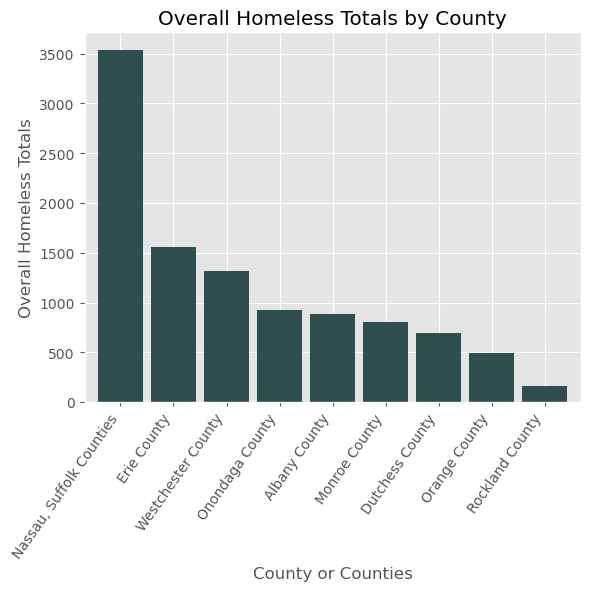

In [2504]:
overall_coc_bar = coc_bar(overall_grouping, 'coc_name', 'Overall Homeless', 'Overall Homeless Totals', 'Overall Homeless Totals by County', 'darkslategrey', 'Nassau, Suffolk Counties', 'Erie County', 'Westchester County', 'Onondaga County', 'Albany County', 'Monroe County', 'Dutchess County', 'Orange County', 'Rockland County') 

In [2505]:
sheltered_total_grouping = grouping('sheltered_total_PIT_df', PIT_COC_county_data, 'coc_name', 'Sheltered Total Homeless')

,coc_name,Sheltered Total Homeless
0,"Nassau, Suffolk Counties CoC",3337
1,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",1529
2,"Yonkers, Mount Vernon/Westchester County CoC",1260
3,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",895
4,Albany City & County CoC,788
5,"Rochester, Irondequoit, Greece/Monroe County CoC",761
6,Poughkeepsie/Dutchess County CoC,672
7,"Newburgh, Middletown/Orange County CoC",426
8,Rockland County CoC,114


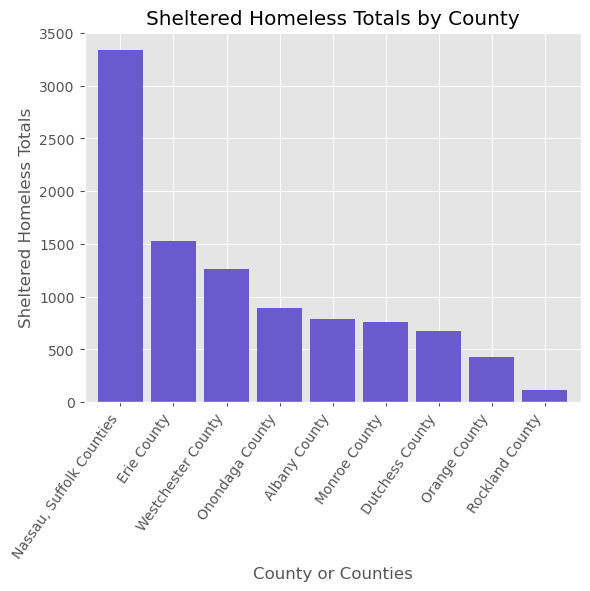

In [2506]:
sheltered_total_coc_bar = coc_bar(sheltered_total_grouping, 'coc_name', 'Sheltered Total Homeless', 'Sheltered Homeless Totals', 'Sheltered Homeless Totals by County', 'slateblue', 'Nassau, Suffolk Counties', 'Erie County', 'Westchester County', 'Onondaga County', 'Albany County', 'Monroe County', 'Dutchess County', 'Orange County', 'Rockland County') 

In [2507]:
unsheltered_total_grouping = grouping('overall_PIT_df', PIT_COC_county_data, 'coc_name', 'Unsheltered Homeless')

,coc_name,Unsheltered Homeless
0,"Nassau, Suffolk Counties CoC",199
1,Albany City & County CoC,101
2,"Newburgh, Middletown/Orange County CoC",65
3,"Yonkers, Mount Vernon/Westchester County CoC",57
4,Rockland County CoC,43
5,"Rochester, Irondequoit, Greece/Monroe County CoC",42
6,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",31
7,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",29
8,Poughkeepsie/Dutchess County CoC,19


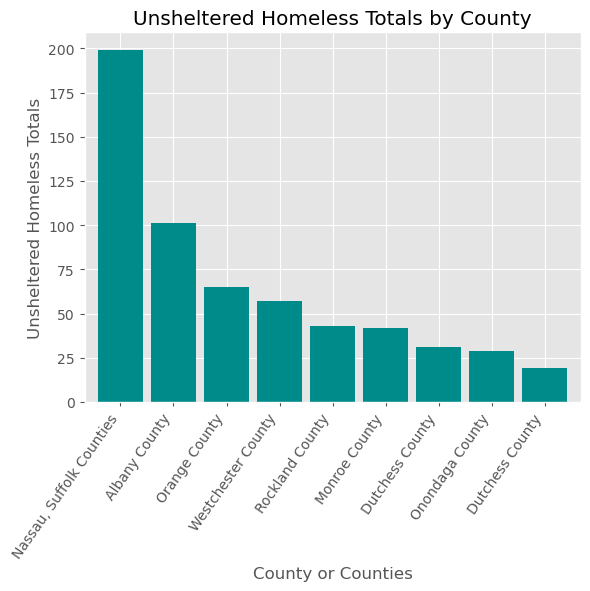

In [2508]:
unsheltered_total_coc_bar = coc_bar(unsheltered_total_grouping, 'coc_name', 'Unsheltered Homeless', 'Unsheltered Homeless Totals', 'Unsheltered Homeless Totals by County', 'darkcyan', 'Nassau, Suffolk Counties', 'Albany County', 'Orange County', 'Westchester County', 'Rockland County', 'Monroe County', 'Dutchess County', 'Onondaga County', 'Dutchess County') 

In [2511]:
overall_homeless_ind_grouping = grouping('overall_homeless_ind_df', PIT_COC_county_data, 'coc_name', 'Overall Homeless Individuals')

,coc_name,Overall Homeless Individuals
0,"Nassau, Suffolk Counties CoC",1080
1,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",1015
2,"Yonkers, Mount Vernon/Westchester County CoC",619
3,Albany City & County CoC,592
4,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",580
5,"Rochester, Irondequoit, Greece/Monroe County CoC",448
6,Poughkeepsie/Dutchess County CoC,388
7,"Newburgh, Middletown/Orange County CoC",233
8,Rockland County CoC,113


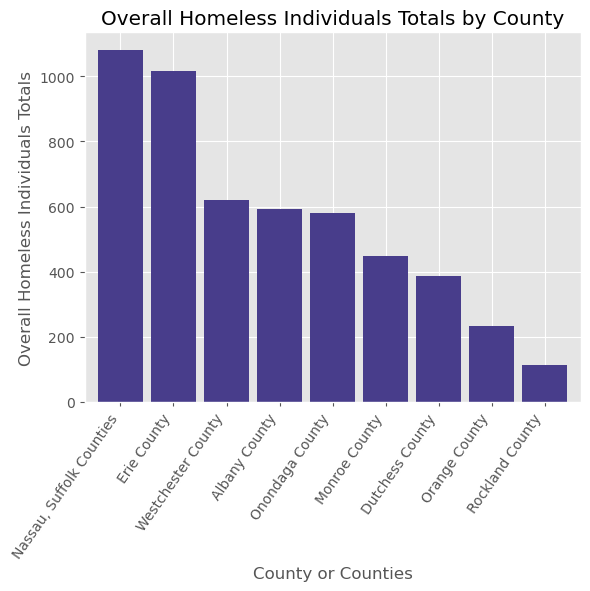

In [2512]:
overall_homeless_ind_coc_bar = coc_bar(overall_homeless_ind_grouping, 'coc_name', 'Overall Homeless Individuals', 'Overall Homeless Individuals Totals', 'Overall Homeless Individuals Totals by County', 'darkslateblue', 'Nassau, Suffolk Counties', 'Erie County', 'Westchester County', 'Albany County', 'Onondaga County', 'Monroe County', 'Dutchess County', 'Orange County', 'Rockland County') 

In [2513]:
sheltered_homeless_ind_grouping = grouping('sheltered_homeless_ind_df', PIT_COC_county_data, 'coc_name', 'Sheltered Total Homeless Individuals')

,coc_name,Sheltered Total Homeless Individuals
0,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",984
1,"Nassau, Suffolk Counties CoC",881
2,"Yonkers, Mount Vernon/Westchester County CoC",562
3,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",551
4,Albany City & County CoC,491
5,"Rochester, Irondequoit, Greece/Monroe County CoC",406
6,Poughkeepsie/Dutchess County CoC,369
7,"Newburgh, Middletown/Orange County CoC",171
8,Rockland County CoC,70


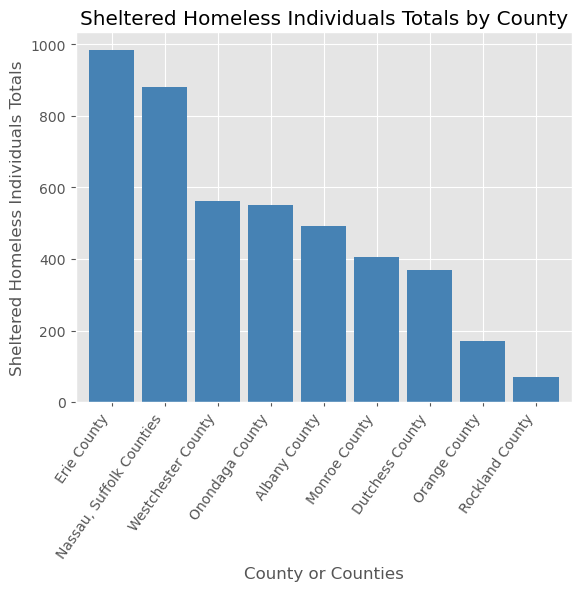

In [2514]:
sheltered_homeless_ind_coc_bar = coc_bar(sheltered_homeless_ind_grouping, 'coc_name', 'Sheltered Total Homeless Individuals', 'Sheltered Homeless Individuals Totals', 'Sheltered Homeless Individuals Totals by County', 'steelblue', 'Erie County', 'Nassau, Suffolk Counties', 'Westchester County', 'Onondaga County', 'Albany County', 'Monroe County', 'Dutchess County', 'Orange County', 'Rockland County')

In [2515]:
unsheltered_homeless_ind_grouping = grouping('unsheltered_homeless_ind_df', PIT_COC_county_data, 'coc_name', 'Unsheltered Homeless Individuals')

,coc_name,Unsheltered Homeless Individuals
0,"Nassau, Suffolk Counties CoC",199
1,Albany City & County CoC,101
2,"Newburgh, Middletown/Orange County CoC",62
3,"Yonkers, Mount Vernon/Westchester County CoC",57
4,Rockland County CoC,43
5,"Rochester, Irondequoit, Greece/Monroe County CoC",42
6,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",31
7,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",29
8,Poughkeepsie/Dutchess County CoC,19


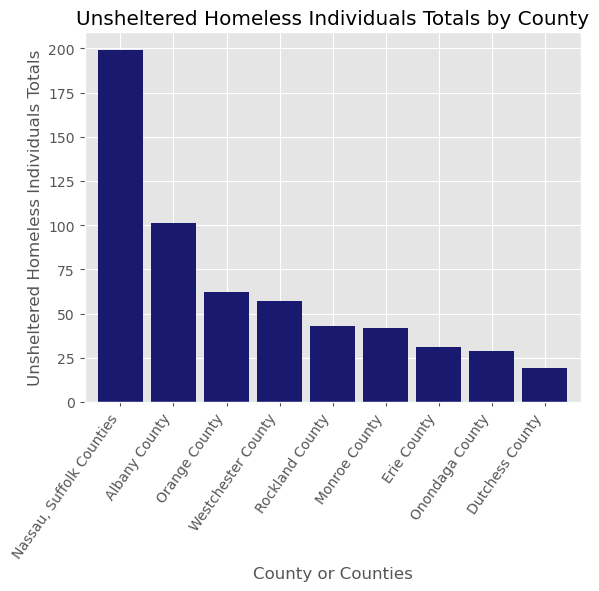

In [2516]:
unsheltered_homeless_ind_coc_bar = coc_bar(unsheltered_homeless_ind_grouping, 'coc_name', 'Unsheltered Homeless Individuals', 'Unsheltered Homeless Individuals Totals', 'Unsheltered Homeless Individuals Totals by County', 'midnightblue', 'Nassau, Suffolk Counties', 'Albany County', 'Orange County', 'Westchester County', 'Rockland County', 'Monroe County', 'Erie County', 'Onondaga County', 'Dutchess County')

In [2517]:
overall_homeless_fam_grouping = grouping('overall_homeless_fam_df', PIT_COC_county_data, 'coc_name', 'Overall Homeless Family Households')

,coc_name,Overall Homeless Family Households
0,"Nassau, Suffolk Counties CoC",610
1,"Yonkers, Mount Vernon/Westchester County CoC",234
2,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",163
3,Poughkeepsie/Dutchess County CoC,108
4,Albany City & County CoC,104
5,"Rochester, Irondequoit, Greece/Monroe County CoC",101
6,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",101
7,"Newburgh, Middletown/Orange County CoC",83
8,Rockland County CoC,14


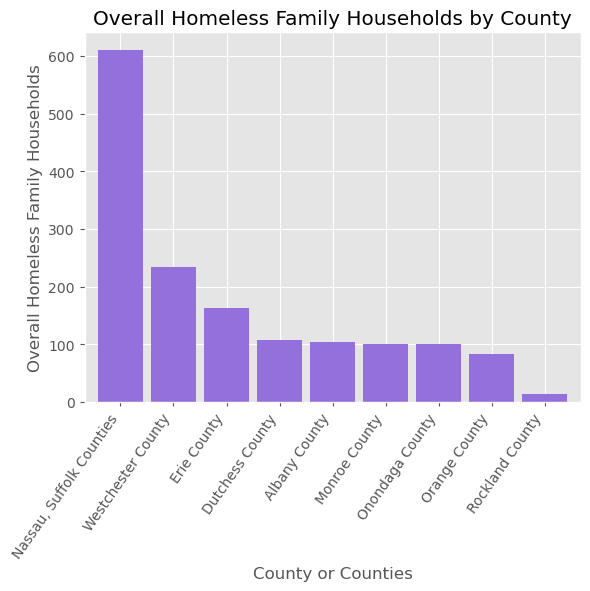

In [2518]:
overall_homeless_fam_coc_bar = coc_bar(overall_homeless_fam_grouping, 'coc_name', 'Overall Homeless Family Households', 'Overall Homeless Family Households', 'Overall Homeless Family Households by County', 'mediumpurple', 'Nassau, Suffolk Counties', 'Westchester County', 'Erie County', 'Dutchess County', 'Albany County', 'Monroe County', 'Onondaga County', 'Orange County', 'Rockland County')

In [2519]:
sheltered_homeless_fam_grouping = grouping('sheltered_homeless_fam_grouping', PIT_COC_county_data, 'coc_name', 'Sheltered Total Homeless Family Households')

,coc_name,Sheltered Total Homeless Family Households
0,"Nassau, Suffolk Counties CoC",610
1,"Yonkers, Mount Vernon/Westchester County CoC",234
2,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",163
3,Poughkeepsie/Dutchess County CoC,108
4,Albany City & County CoC,104
5,"Rochester, Irondequoit, Greece/Monroe County CoC",101
6,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",101
7,"Newburgh, Middletown/Orange County CoC",82
8,Rockland County CoC,14


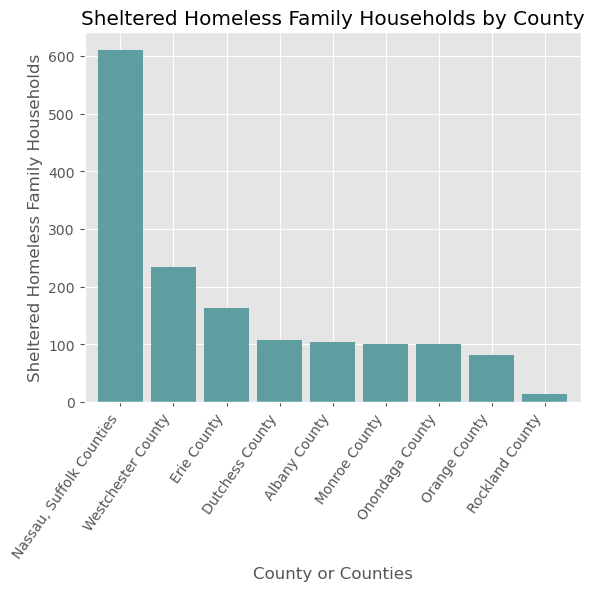

In [2520]:
sheltered_homeless_fam_coc_bar = coc_bar(sheltered_homeless_fam_grouping, 'coc_name', 'Sheltered Total Homeless Family Households', 'Sheltered Homeless Family Households', 'Sheltered Homeless Family Households by County', 'cadetblue', 'Nassau, Suffolk Counties', 'Westchester County', 'Erie County', 'Dutchess County', 'Albany County', 'Monroe County', 'Onondaga County', 'Orange County', 'Rockland County')

In [2521]:
unsheltered_homeless_fam_grouping = grouping('unsheltered_homeless_fam_grouping', PIT_COC_county_data, 'coc_name', 'Unsheltered Homeless Family Households')

,coc_name,Unsheltered Homeless Family Households
0,"Newburgh, Middletown/Orange County CoC",1
1,Albany City & County CoC,0
2,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",0
3,"Nassau, Suffolk Counties CoC",0
4,Poughkeepsie/Dutchess County CoC,0
5,"Rochester, Irondequoit, Greece/Monroe County CoC",0
6,Rockland County CoC,0
7,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",0
8,"Yonkers, Mount Vernon/Westchester County CoC",0


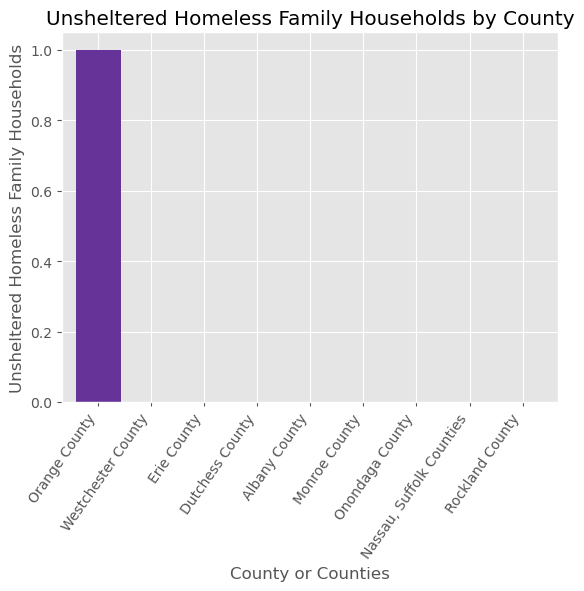

In [2522]:
unsheltered_homeless_fam_coc_bar = coc_bar(unsheltered_homeless_fam_grouping, 'coc_name', 'Unsheltered Homeless Family Households', 'Unsheltered Homeless Family Households', 'Unsheltered Homeless Family Households by County', 'rebeccapurple', 'Orange County', 'Westchester County', 'Erie County', 'Dutchess County', 'Albany County', 'Monroe County', 'Onondaga County', 'Nassau, Suffolk Counties', 'Rockland County')

In [2523]:
overall_chronic_homeless_grouping = grouping('overall_chronic_homeless_grouping', PIT_COC_county_data, 'coc_name', 'Overall Chronically Homeless')

,coc_name,Overall Chronically Homeless
0,"Nassau, Suffolk Counties CoC",111
1,"Yonkers, Mount Vernon/Westchester County CoC",97
2,Albany City & County CoC,96
3,"Rochester, Irondequoit, Greece/Monroe County CoC",95
4,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",92
5,Poughkeepsie/Dutchess County CoC,80
6,"Newburgh, Middletown/Orange County CoC",62
7,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",61
8,Rockland County CoC,39


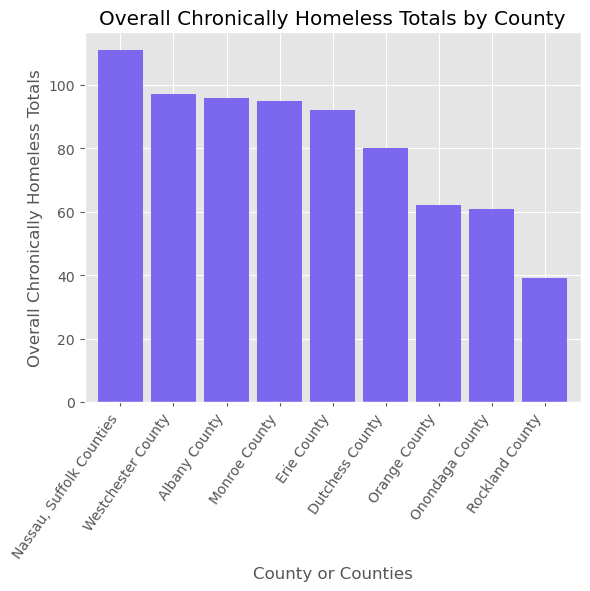

In [2524]:
overall_chronic_homeless_coc_bar = coc_bar(overall_chronic_homeless_grouping, 'coc_name', 'Overall Chronically Homeless', 'Overall Chronically Homeless Totals', 'Overall Chronically Homeless Totals by County', 'mediumslateblue', 'Nassau, Suffolk Counties', 'Westchester County', 'Albany County', 'Monroe County', 'Erie County', 'Dutchess County', 'Orange County', 'Onondaga County', 'Rockland County')

In [2525]:
sheltered_chronic_homeless_grouping = grouping('sheltered_chronic_homeless_grouping', PIT_COC_county_data, 'coc_name', 'Sheltered Total Chronically Homeless')

,coc_name,Sheltered Total Chronically Homeless
0,"Yonkers, Mount Vernon/Westchester County CoC",85
1,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",82
2,"Rochester, Irondequoit, Greece/Monroe County CoC",78
3,Poughkeepsie/Dutchess County CoC,69
4,"Nassau, Suffolk Counties CoC",58
5,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",49
6,Albany City & County CoC,36
7,"Newburgh, Middletown/Orange County CoC",19
8,Rockland County CoC,15


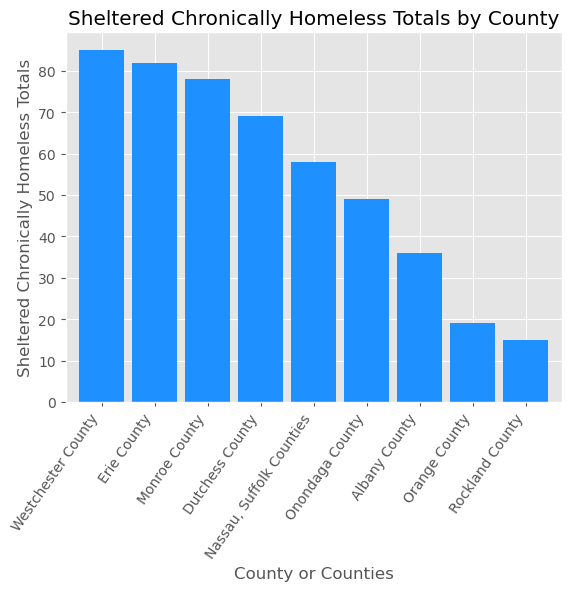

In [2526]:
sheltered_chronic_homeless_coc_bar = coc_bar(sheltered_chronic_homeless_grouping, 'coc_name', 'Sheltered Total Chronically Homeless', 'Sheltered Chronically Homeless Totals', 'Sheltered Chronically Homeless Totals by County', 'dodgerblue', 'Westchester County', 'Erie County', 'Monroe County', 'Dutchess County', 'Nassau, Suffolk Counties', 'Onondaga County', 'Albany County', 'Orange County', 'Rockland County')

In [2527]:
unsheltered_chronic_homeless_grouping = grouping('unsheltered_chronic_homeless_grouping', PIT_COC_county_data, 'coc_name', 'Unsheltered Chronically Homeless')

,coc_name,Unsheltered Chronically Homeless
0,Albany City & County CoC,60
1,"Nassau, Suffolk Counties CoC",53
2,"Newburgh, Middletown/Orange County CoC",43
3,Rockland County CoC,24
4,"Rochester, Irondequoit, Greece/Monroe County CoC",17
5,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",12
6,"Yonkers, Mount Vernon/Westchester County CoC",12
7,Poughkeepsie/Dutchess County CoC,11
8,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",10


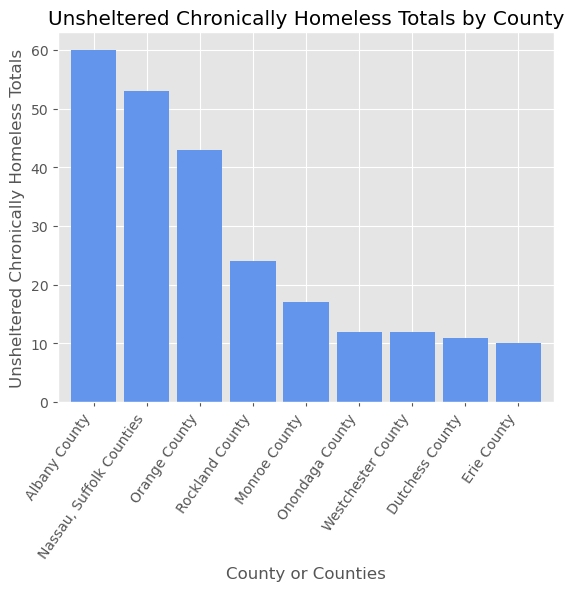

In [2528]:
unsheltered_chronic_homeless_coc_bar = coc_bar(unsheltered_chronic_homeless_grouping, 'coc_name', 'Unsheltered Chronically Homeless', 'Unsheltered Chronically Homeless Totals', 'Unsheltered Chronically Homeless Totals by County', 'cornflowerblue', 'Albany County', 'Nassau, Suffolk Counties', 'Orange County', 'Rockland County', 'Monroe County', 'Onondaga County', 'Westchester County', 'Dutchess County', 'Erie County')

<h3>Beds Available</h3>

In [2529]:
totals_by_county = hud_num_df.groupby(['CoC', 'Total Year-Round Beds (ES, TH, SH)', 'Total Year-Round Beds (ES)', 'Total Year-Round Beds (TH)', 'Total Year-Round Beds (SH)', 'Total Year-Round Beds (RRH)', 'Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)', 'PIT Count'])['Total Beds'].sum().reset_index().rename(columns={0: 'total_beds', 'CoC': 'CoC', 'Total Year-Round Beds (ES, TH, SH)': 'Total Year-Round Beds (ES, TH, SH)', 'Total Year-Round Beds (ES)': 'Total Year-Round Beds (ES)', 'Total Year-Round Beds (TH)': 'Total Year-Round Beds (TH)', 'Total Year-Round Beds (SH)': 'Total Year-Round Beds (SH)', 'Total Year-Round Beds (RRH)': 'Total Year-Round Beds (RRH)', 'Total Year-Round Beds (PSH)': 'Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)': 'Total Year-Round Beds (OPH)', 'PIT Count': 'PIT Count'})
display(totals_by_county)

,CoC,"Total Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),Total Year-Round Beds (RRH),Total Year-Round Beds (PSH),Total Year-Round Beds (OPH),PIT Count,Total Beds
0,Albany City & County CoC,473,314,157,2,283,822,25,1,10
1,Albany City & County CoC,473,314,157,2,283,822,25,2,11
2,Albany City & County CoC,473,314,157,2,283,822,25,4,26
3,Albany City & County CoC,473,314,157,2,283,822,25,5,40
4,Albany City & County CoC,473,314,157,2,283,822,25,6,6
...,...,...,...,...,...,...,...,...,...,...
345,"Yonkers, Mount Vernon/Westchester County CoC",1634,1112,522,0,228,1497,3082,182,182
346,"Yonkers, Mount Vernon/Westchester County CoC",1634,1112,522,0,228,1497,3082,259,300
347,"Yonkers, Mount Vernon/Westchester County CoC",1634,1112,522,0,228,1497,3082,647,647
348,"Yonkers, Mount Vernon/Westchester County CoC",1634,1112,522,0,228,1497,3082,779,673


In [2530]:
ES_totals_by_county = hud_num_df.groupby(['CoC', 'Total Year-Round Beds (ES)', 'Total Non-DV Year-Round Beds (ES)', 'Total HMIS Year-Round Beds (ES)', 'Total Seasonal Beds (ES)', 'Total Overflow Beds (ES)', 'Total Units for Households with Children (ES)', 'Total Beds for Households with Children (ES)', 'Total Beds for Households without Children (ES)', 'Total Beds for Households with only Children (ES)', 'PIT Count'])['Total Beds'].sum().reset_index().rename(columns={0: 'total_beds', 'CoC': 'CoC', 'Total Year-Round Beds (ES)': 'Total Year-Round Beds (ES)', 'Total Non-DV Year-Round Beds (ES)': 'Total Non-DV Year-Round Beds (ES)', 'Total HMIS Year-Round Beds (ES)': 'Total HMIS Year-Round Beds (ES)', 'Total Seasonal Beds (ES)': 'Total Seasonal Beds (ES)', 'Total Overflow Beds (ES)': 'Total Overflow Beds (ES)', 'Total Units for Households with Children (ES)': 'Total Units for Households with Children (ES)', 'Total Beds for Households without Children (ES)': 'Total Beds for Households without Children (ES)', 'Total Beds for Households with only Children (ES)': 'Total Beds for Households with only Children (ES)', 'PIT Count': 'PIT Count'})

display(ES_totals_by_county)

,CoC,Total Year-Round Beds (ES),Total Non-DV Year-Round Beds (ES),Total HMIS Year-Round Beds (ES),Total Seasonal Beds (ES),Total Overflow Beds (ES),Total Units for Households with Children (ES),Total Beds for Households with Children (ES),Total Beds for Households without Children (ES),Total Beds for Households with only Children (ES),PIT Count,Total Beds
0,Albany City & County CoC,314,284,167,34,346,41,118,196,0,1,10
1,Albany City & County CoC,314,284,167,34,346,41,118,196,0,2,11
2,Albany City & County CoC,314,284,167,34,346,41,118,196,0,4,26
3,Albany City & County CoC,314,284,167,34,346,41,118,196,0,5,40
4,Albany City & County CoC,314,284,167,34,346,41,118,196,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
345,"Yonkers, Mount Vernon/Westchester County CoC",1112,1073,1070,46,4,207,599,499,14,182,182
346,"Yonkers, Mount Vernon/Westchester County CoC",1112,1073,1070,46,4,207,599,499,14,259,300
347,"Yonkers, Mount Vernon/Westchester County CoC",1112,1073,1070,46,4,207,599,499,14,647,647
348,"Yonkers, Mount Vernon/Westchester County CoC",1112,1073,1070,46,4,207,599,499,14,779,673


In [2531]:
print(ES_totals_by_county['CoC'].value_counts())

CoC
Nassau, Suffolk Counties CoC                                                    61
Rochester, Irondequoit, Greece/Monroe County CoC                                50
Syracuse, Auburn/Onondaga, Oswego, Cayuga Counties CoC                          49
Buffalo, Niagara Falls/Erie, Niagara, Orleans, Genesee, Wyoming Counties CoC    47
Yonkers, Mount Vernon/Westchester County CoC                                    45
Albany City & County CoC                                                        38
Poughkeepsie/Dutchess County CoC                                                25
Newburgh, Middletown/Orange County CoC                                          24
Rockland County CoC                                                             11
Name: count, dtype: int64


In [2532]:
TH_totals_by_county = hud_num_df.groupby(['CoC', 'Total Year-Round Beds (TH)', 'Total Non-DV Year-Round Beds (TH)', 'Total HMIS Year-Round Beds (TH)', 'Total Units for Households with Children (TH)', 'Total Beds for Households with Children (TH)', 'Total Beds for Households without Children (TH)', 'Total Beds for Households with only Children (TH)', 'PIT Count'])['Total Beds'].sum().reset_index().rename(columns={0: 'total_beds', 'CoC': 'CoC', 'Total Year-Round Beds (TH)': 'Total Year-Round Beds (TH)', 'Total Non-DV Year-Round Beds (TH)': 'Total Non-DV Year-Round Beds (TH)', 'Total HMIS Year-Round Beds (TH)': 'Total HMIS Year-Round Beds (TH)', 'Total Units for Households with Children (TH)': 'Total Units for Households with Children (TH)', 'Total Beds for Households without Children (TH)': 'Total Beds for Households without Children (TH)', 'Total Beds for Households with only Children (TH)': 'Total Beds for Households with only Children (TH)', 'PIT Count': 'PIT Count'})

display(TH_totals_by_county)

,CoC,Total Year-Round Beds (TH),Total Non-DV Year-Round Beds (TH),Total HMIS Year-Round Beds (TH),Total Units for Households with Children (TH),Total Beds for Households with Children (TH),Total Beds for Households without Children (TH),Total Beds for Households with only Children (TH),PIT Count,Total Beds
0,Albany City & County CoC,157,157,41,15,22,135,0,1,10
1,Albany City & County CoC,157,157,41,15,22,135,0,2,11
2,Albany City & County CoC,157,157,41,15,22,135,0,4,26
3,Albany City & County CoC,157,157,41,15,22,135,0,5,40
4,Albany City & County CoC,157,157,41,15,22,135,0,6,6
...,...,...,...,...,...,...,...,...,...,...
345,"Yonkers, Mount Vernon/Westchester County CoC",522,510,522,160,479,43,0,182,182
346,"Yonkers, Mount Vernon/Westchester County CoC",522,510,522,160,479,43,0,259,300
347,"Yonkers, Mount Vernon/Westchester County CoC",522,510,522,160,479,43,0,647,647
348,"Yonkers, Mount Vernon/Westchester County CoC",522,510,522,160,479,43,0,779,673


In [2533]:
SH_totals_by_county = hud_num_df.groupby(['CoC', 'Total Year-Round Beds (SH)', 'Total Non-DV Year-Round Beds (SH)', 'Total HMIS Year-Round Beds (SH)', 'Total Units for Households with Children (SH)', 'Total Beds for Households with Children (SH)', 'Total Beds for Households without Children (SH)', 'Total Beds for Households with only Children (SH)', 'PIT Count'])['Total Beds'].sum().reset_index().rename(columns={0: 'total_beds', 'CoC': 'CoC', 'Total Year-Round Beds (SH)': 'Total Year-Round Beds (SH)', 'Total Non-DV Year-Round Beds (SH)': 'Total Non-DV Year-Round Beds (SH)', 'Total HMIS Year-Round Beds (SH)': 'Total HMIS Year-Round Beds (SH)', 'Total Units for Households with Children (SH)': 'Total Units for Households with Children (SH)', 'Total Beds for Households without Children (SH)': 'Total Beds for Households without Children (SH)', 'Total Beds for Households with only Children (SH)': 'Total Beds for Households with only Children (SH)', 'PIT Count': 'PIT Count'})

display(SH_totals_by_county)

,CoC,Total Year-Round Beds (SH),Total Non-DV Year-Round Beds (SH),Total HMIS Year-Round Beds (SH),Total Units for Households with Children (SH),Total Beds for Households with Children (SH),Total Beds for Households without Children (SH),Total Beds for Households with only Children (SH),PIT Count,Total Beds
0,Albany City & County CoC,2,2,2,0,0,2,0,1,10
1,Albany City & County CoC,2,2,2,0,0,2,0,2,11
2,Albany City & County CoC,2,2,2,0,0,2,0,4,26
3,Albany City & County CoC,2,2,2,0,0,2,0,5,40
4,Albany City & County CoC,2,2,2,0,0,2,0,6,6
...,...,...,...,...,...,...,...,...,...,...
345,"Yonkers, Mount Vernon/Westchester County CoC",0,0,0,0,0,0,0,182,182
346,"Yonkers, Mount Vernon/Westchester County CoC",0,0,0,0,0,0,0,259,300
347,"Yonkers, Mount Vernon/Westchester County CoC",0,0,0,0,0,0,0,647,647
348,"Yonkers, Mount Vernon/Westchester County CoC",0,0,0,0,0,0,0,779,673


In [2534]:
RRH_totals_by_county = hud_num_df.groupby(['CoC', 'Total Year-Round Beds (RRH)', 'Total Non-DV Year-Round Beds (RRH)', 'Total HMIS Year-Round Beds (RRH)', 'Total Units for Households with Children (RRH)', 'Total Beds for Households with Children (RRH)', 'Total Beds for Households without Children (RRH)', 'Total Beds for Households with only Children (RRH)', 'PIT Count'])['Total Beds'].sum().reset_index().rename(columns={0: 'total_beds', 'CoC': 'CoC', 'Total Year-Round Beds (RRH)': 'Total Year-Round Beds (RRH)', 'Total Non-DV Year-Round Beds (RRH)': 'Total Non-DV Year-Round Beds (RRH)', 'Total HMIS Year-Round Beds (RRH)': 'Total HMIS Year-Round Beds (RRH)', 'Total Units for Households with Children (RRH)': 'Total Units for Households with Children (RRH)', 'Total Beds for Households without Children (RRH)': 'Total Beds for Households without Children (RRH)', 'Total Beds for Households with only Children (RRH)': 'Total Beds for Households with only Children (RRH)', 'PIT Count': 'PIT Count'})

display(RRH_totals_by_county)

,CoC,Total Year-Round Beds (RRH),Total Non-DV Year-Round Beds (RRH),Total HMIS Year-Round Beds (RRH),Total Units for Households with Children (RRH),Total Beds for Households with Children (RRH),Total Beds for Households without Children (RRH),Total Beds for Households with only Children (RRH),PIT Count,Total Beds
0,Albany City & County CoC,283,185,185,46,149,134,0,1,10
1,Albany City & County CoC,283,185,185,46,149,134,0,2,11
2,Albany City & County CoC,283,185,185,46,149,134,0,4,26
3,Albany City & County CoC,283,185,185,46,149,134,0,5,40
4,Albany City & County CoC,283,185,185,46,149,134,0,6,6
...,...,...,...,...,...,...,...,...,...,...
345,"Yonkers, Mount Vernon/Westchester County CoC",228,185,228,59,174,54,0,182,182
346,"Yonkers, Mount Vernon/Westchester County CoC",228,185,228,59,174,54,0,259,300
347,"Yonkers, Mount Vernon/Westchester County CoC",228,185,228,59,174,54,0,647,647
348,"Yonkers, Mount Vernon/Westchester County CoC",228,185,228,59,174,54,0,779,673


In [2535]:
PSH_totals_by_county = hud_num_df.groupby(['CoC', 'Total Year-Round Beds (PSH)', 'Total Non-DV Year-Round Beds (PSH)', 'Total HMIS Year-Round Beds (PSH)', 'Total Units for Households with Children (PSH)', 'Total Beds for Households with Children (PSH)', 'Total Beds for Households without Children (PSH)', 'Total Beds for Households with only Children (PSH)', 'PIT Count'])['Total Beds'].sum().reset_index().rename(columns={0: 'total_beds', 'CoC': 'CoC', 'Total Year-Round Beds (PSH)': 'Total Year-Round Beds (PSH)', 'Total Non-DV Year-Round Beds (PSH)': 'Total Non-DV Year-Round Beds (PSH)', 'Total HMIS Year-Round Beds (PSH)': 'Total HMIS Year-Round Beds (PSH)', 'Total Seasonal Beds (PSH)': 'Total Seasonal Beds (PSH)', 'Total Overflow Beds (PSH)': 'Total Overflow Beds (PSH)', 'Total Units for Households with Children (PSH)': 'Total Units for Households with Children (PSH)', 'Total Beds for Households without Children (PSH)': 'Total Beds for Households without Children (PSH)', 'Total Beds for Households with only Children (PSH)': 'Total Beds for Households with only Children (PSH)', 'PIT Count': 'PIT Count'})

display(PSH_totals_by_county)

,CoC,Total Year-Round Beds (PSH),Total Non-DV Year-Round Beds (PSH),Total HMIS Year-Round Beds (PSH),Total Units for Households with Children (PSH),Total Beds for Households with Children (PSH),Total Beds for Households without Children (PSH),Total Beds for Households with only Children (PSH),PIT Count,Total Beds
0,Albany City & County CoC,822,822,812,115,323,499,0,1,10
1,Albany City & County CoC,822,822,812,115,323,499,0,2,11
2,Albany City & County CoC,822,822,812,115,323,499,0,4,26
3,Albany City & County CoC,822,822,812,115,323,499,0,5,40
4,Albany City & County CoC,822,822,812,115,323,499,0,6,6
...,...,...,...,...,...,...,...,...,...,...
345,"Yonkers, Mount Vernon/Westchester County CoC",1497,1497,1370,224,553,944,0,182,182
346,"Yonkers, Mount Vernon/Westchester County CoC",1497,1497,1370,224,553,944,0,259,300
347,"Yonkers, Mount Vernon/Westchester County CoC",1497,1497,1370,224,553,944,0,647,647
348,"Yonkers, Mount Vernon/Westchester County CoC",1497,1497,1370,224,553,944,0,779,673


In [2536]:
OPH_totals_by_county = hud_num_df.groupby(['CoC', 'Total Year-Round Beds (OPH)', 'Total Non-DV Year-Round Beds (OPH)', 'Total HMIS Year-Round Beds (OPH)', 'Total Units for Households with Children (OPH)', 'Total Beds for Households with Children (OPH)', 'Total Beds for Households without Children (OPH)', 'Total Beds for Households with only Children (OPH)', 'PIT Count'])['Total Beds'].sum().reset_index().rename(columns={0: 'total_beds', 'CoC': 'CoC', 'Total Year-Round Beds (OPH)': 'Total Year-Round Beds (OPH)', 'Total Non-DV Year-Round Beds (OPH)': 'Total Non-DV Year-Round Beds (OPH)', 'Total HMIS Year-Round Beds (OPH)': 'Total HMIS Year-Round Beds (OPH)', 'Total Seasonal Beds (OPH)': 'Total Seasonal Beds (OPH)', 'Total Overflow Beds (OPH)': 'Total Overflow Beds (OPH)', 'Total Units for Households with Children (OPH)': 'Total Units for Households with Children (OPH)', 'Total Beds for Households without Children (OPH)': 'Total Beds for Households without Children (OPH)', 'Total Beds for Households with only Children (OPH)': 'Total Beds for Households with only Children (OPH)', 'PIT Count': 'PIT Count'})

display(OPH_totals_by_county)

,CoC,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),PIT Count,Total Beds
0,Albany City & County CoC,25,25,0,2,5,20,0,1,10
1,Albany City & County CoC,25,25,0,2,5,20,0,2,11
2,Albany City & County CoC,25,25,0,2,5,20,0,4,26
3,Albany City & County CoC,25,25,0,2,5,20,0,5,40
4,Albany City & County CoC,25,25,0,2,5,20,0,6,6
...,...,...,...,...,...,...,...,...,...,...
345,"Yonkers, Mount Vernon/Westchester County CoC",3082,3082,2390,772,2628,454,0,182,182
346,"Yonkers, Mount Vernon/Westchester County CoC",3082,3082,2390,772,2628,454,0,259,300
347,"Yonkers, Mount Vernon/Westchester County CoC",3082,3082,2390,772,2628,454,0,647,647
348,"Yonkers, Mount Vernon/Westchester County CoC",3082,3082,2390,772,2628,454,0,779,673


In [2537]:
HH_totals_by_county = hud_num_df.groupby(['CoC', 'Beds HH w/ Children', 'Units HH w/ Children', 'CH Beds HH w/ Children', 'Beds HH w/o Children', 'CH Beds HH w/o Children', 'Beds HH w/ only Children', 'CH Beds HH w only Children', 'Year-Round Beds', 'Total Seasonal Beds', 'O/V Beds', 'PIT Count'])['Total Beds'].sum().reset_index().rename(columns={0: 'total_beds', 'CoC': 'CoC', 'Beds HH w/ Children': 'Beds HH w/ Children', 'Units HH w/ Children': 'Units HH w/ Children', 'CH Beds HH w/ Children': 'CH Beds HH w/ Children', 'Beds HH w/o Children': 'Beds HH w/o Children', 'CH Beds HH w/o Children': 'CH Beds HH w/o Children', 'Beds HH w/ only Children': 'Beds HH w/ only Children', 'CH Beds HH w only Children': 'CH Beds HH w only Children', 'Year-Round Beds': 'Year-Round Beds', 'Total Seasonal Beds': 'Total Seasonal Beds', 'O/V Beds': 'O/V Beds', 'PIT Count': 'PIT Count'})

display(HH_totals_by_county)

,CoC,Beds HH w/ Children,Units HH w/ Children,CH Beds HH w/ Children,Beds HH w/o Children,CH Beds HH w/o Children,Beds HH w/ only Children,CH Beds HH w only Children,Year-Round Beds,Total Seasonal Beds,O/V Beds,PIT Count,Total Beds
0,Albany City & County CoC,0,0,0,0,0,0,0,0,0,8,1,8
1,Albany City & County CoC,0,0,0,0,0,0,0,0,0,8,8,8
2,Albany City & County CoC,0,0,0,0,0,0,0,0,0,83,83,83
3,Albany City & County CoC,0,0,0,0,0,0,0,0,0,156,156,156
4,Albany City & County CoC,0,0,0,0,0,0,0,0,15,0,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,"Yonkers, Mount Vernon/Westchester County CoC",210,70,0,0,0,0,0,210,0,0,110,210
638,"Yonkers, Mount Vernon/Westchester County CoC",300,100,0,0,0,0,0,300,0,0,259,300
639,"Yonkers, Mount Vernon/Westchester County CoC",305,116,0,368,0,0,0,673,0,0,779,673
640,"Yonkers, Mount Vernon/Westchester County CoC",647,238,0,0,0,0,0,647,0,0,647,647


In [2538]:
display(totals_by_county.sample(10))

,CoC,"Total Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),Total Year-Round Beds (RRH),Total Year-Round Beds (PSH),Total Year-Round Beds (OPH),PIT Count,Total Beds
157,"Newburgh, Middletown/Orange County CoC",264,217,47,0,75,297,66,23,47
301,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",740,580,160,0,441,946,538,132,126
250,Rockland County CoC,73,43,30,0,32,75,170,15,15
32,Albany City & County CoC,473,314,157,2,283,822,25,85,85
84,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",1546,1102,444,0,410,1263,70,344,327
229,"Rochester, Irondequoit, Greece/Monroe County CoC",835,662,161,12,453,1394,226,55,55
220,"Rochester, Irondequoit, Greece/Monroe County CoC",835,662,161,12,453,1394,226,35,35
121,"Nassau, Suffolk Counties CoC",3545,3424,101,20,702,2428,1323,44,90
17,Albany City & County CoC,473,314,157,2,283,822,25,26,30
144,"Nassau, Suffolk Counties CoC",3545,3424,101,20,702,2428,1323,627,714


In [2539]:
totals_by_county['total_beds'] = totals_by_county['Total Year-Round Beds (ES)'] + totals_by_county['Total Year-Round Beds (TH)'] + totals_by_county['Total Year-Round Beds (SH)'] + totals_by_county['Total Year-Round Beds (RRH)'] + totals_by_county['Total Year-Round Beds (PSH)'] + totals_by_county['Total Year-Round Beds (OPH)']

In [2540]:
beds_by_county = grouping('group_county', totals_by_county, 'CoC', 'total_beds')

,CoC,total_beds
0,"Nassau, Suffolk Counties CoC",487878
1,"Yonkers, Mount Vernon/Westchester County CoC",289845
2,"Buffalo, Niagara Falls/Erie, Niagara, Orleans,...",154583
3,"Rochester, Irondequoit, Greece/Monroe County CoC",145400
4,"Syracuse, Auburn/Onondaga, Oswego, Cayuga Coun...",130585
5,Albany City & County CoC,60914
6,Poughkeepsie/Dutchess County CoC,26475
7,"Newburgh, Middletown/Orange County CoC",16848
8,Rockland County CoC,3850


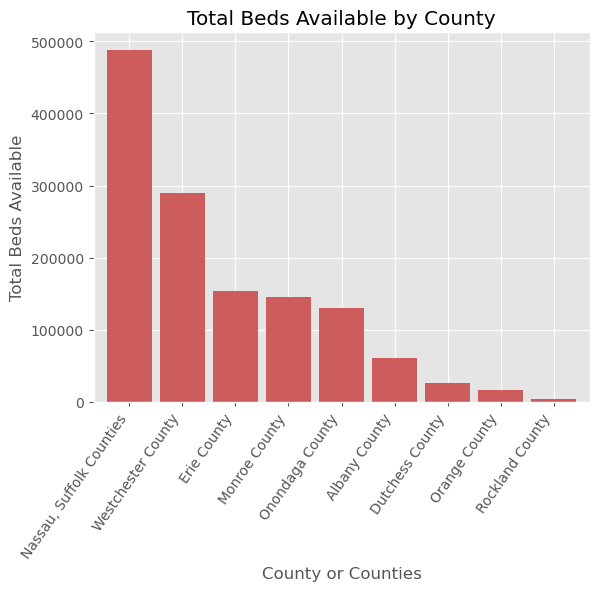

In [2541]:
unsheltered_chronic_homeless_coc_bar = coc_bar(beds_by_county, 'CoC', 'total_beds', 'Total Beds Available', 'Total Beds Available by County', 'indianred', 'Nassau, Suffolk Counties', 'Westchester County', 'Erie County', 'Monroe County', 'Onondaga County', 'Albany County', 'Dutchess County', 'Orange County', 'Rockland County')

<h1>Column Names</h1>

In [2542]:
'''
coc_number                                                 
Total Year-Round Beds (ES, TH, SH)                         
Total Non-DV Year-Round Beds (ES, TH, SH)                  
Total HMIS Year-Round Beds (ES, TH, SH)                    
Total Year-Round Beds (ES)                                 
Total Year-Round Beds (TH)                                 
Total Year-Round Beds (SH)                                 
Total Units for Households with Children (ES, TH, SH)      
Total Beds for Households with Children (ES, TH, SH)       
Total Beds for Households without Children (ES, TH, SH)    
Total Beds for Households with only Children (ES, TH, SH)  

Total Non-DV Year-Round Beds (ES)                          
Total HMIS Year-Round Beds (ES)                            
Total Seasonal Beds (ES)                                   
Total Overflow Beds (ES)                                   
Total Units for Households with Children (ES)              
Total Beds for Households with Children (ES)               
Total Beds for Households without Children (ES)            
Total Beds for Households with only Children (ES)    

Total Non-DV Year-Round Beds (TH)                          
Total HMIS Year-Round Beds (TH)                            
Total Units for Households with Children (TH)              
Total Beds for Households with Children (TH)               
Total Beds for Households without Children (TH)            
Total Beds for Households with only Children (TH)      

Total Non-DV Year-Round Beds (SH)                          
Total HMIS Year-Round Beds (SH)                            
Total Units for Households with Children (SH)              
Total Beds for Households with Children (SH)               
Total Beds for Households without Children (SH)            
Total Beds for Households with only Children (SH)     

Total Year-Round Beds (RRH)                                
Total Non-DV Year-Round Beds (RRH)                         
Total HMIS Year-Round Beds (RRH)                           
Total Units for Households with Children (RRH)             
Total Beds for Households with Children (RRH)              
Total Beds for Households without Children (RRH)           
Total Beds for Households with only Children (RRH)      

Total Year-Round Beds (PSH)                                
Total Non-DV Year-Round Beds (PSH)                         
Total HMIS Year-Round Beds (PSH)                           
Total Units for Households with Children (PSH)             
Total Beds for Households with Children (PSH)              
Total Beds for Households without Children (PSH)           
Total Beds for Households with only Children (PSH)         
Dedicated Chronically Homeless Beds (PSH)        

Total Year-Round Beds (OPH)                                
Total Non-DV Year-Round Beds (OPH)                         
Total HMIS Year-Round Beds (OPH)                           
Total Units for Households with Children (OPH)             
Total Beds for Households with Children (OPH)              
Total Beds for Households without Children (OPH)           
Total Beds for Households with only Children (OPH)      

CoC                                                        
Coc_ID                                                     
Organization ID                                            
Organization Name                                          
Project Name                                               
Project Type                                              
housingType                                                
address1                                                   
address2                                                   
city                                                       
state                                                      
zip             
                                           
Beds HH w/ Children                                        
Units HH w/ Children                                       
CH Beds HH w/ Children                                     
Beds HH w/o Children                                       
CH Beds HH w/o Children                                    
Beds HH w/ only Children                                   
CH Beds HH w only Children                                 
Year-Round Beds                                            
Total Seasonal Beds                                        
O/V Beds                                                   
PIT Count                                                  
Total Beds

'''                                                 

'\ncoc_number                                                 \nTotal Year-Round Beds (ES, TH, SH)                         \nTotal Non-DV Year-Round Beds (ES, TH, SH)                  \nTotal HMIS Year-Round Beds (ES, TH, SH)                    \nTotal Year-Round Beds (ES)                                 \nTotal Year-Round Beds (TH)                                 \nTotal Year-Round Beds (SH)                                 \nTotal Units for Households with Children (ES, TH, SH)      \nTotal Beds for Households with Children (ES, TH, SH)       \nTotal Beds for Households without Children (ES, TH, SH)    \nTotal Beds for Households with only Children (ES, TH, SH)  \n\nTotal Non-DV Year-Round Beds (ES)                          \nTotal HMIS Year-Round Beds (ES)                            \nTotal Seasonal Beds (ES)                                   \nTotal Overflow Beds (ES)                                   \nTotal Units for Households with Children (ES)              \nTotal Beds for Hous

In [2543]:

'''
'State', 'Number of CoCs', 'Overall Homeless', 'Overall Homeless - Under 18', 'Overall Homeless - Age 18 to 24', 'Overall Homeless - Age 25 to 34', 'Overall Homeless - Age 35 to 44', 'Overall Homeless - Age 45 to 54', 'Overall Homeless - Age 55 to 64', 'Overall Homeless - Over 64', 'Overall Homeless - Female', 'Overall Homeless - Male', 'Overall Homeless - Transgender', 'Overall Homeless - Gender that is not Singularly Female or Male', 'Overall Homeless - Gender Questioning', 'Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)', 'Overall Homeless - Hispanic/Latin(o)(a)(x)', 'Overall Homeless - White', 'Overall Homeless - Black, African American, or African', 'Overall Homeless - Asian or Asian American', 'Overall Homeless - American Indian, Alaska Native, or Indigenous', 'Overall Homeless - Native Hawaiian or Other Pacific Islander', 'Overall Homeless - Multiple Races', 'Sheltered ES Homeless', 'Sheltered ES Homeless - Under 18', 'Sheltered ES Homeless - Age 18 to 24', 'Sheltered ES Homeless - Age 25 to 34', 'Sheltered ES Homeless - Age 35 to 44', 'Sheltered ES Homeless - Age 45 to 54', 'Sheltered ES Homeless - Age 55 to 64', 'Sheltered ES Homeless - Over 64', 'Sheltered ES Homeless - Female', 'Sheltered ES Homeless - Male', 'Sheltered ES Homeless - Transgender', 'Sheltered ES Homeless - Gender that is not Singularly Female or Male', 'Sheltered ES Homeless - Gender Questioning', 'Sheltered ES Homeless - Non-Hispanic/Non-Latin(o)(a)(x)', 'Sheltered ES Homeless - Hispanic/Latin(o)(a)(x)', 'Sheltered ES Homeless - White', 'Sheltered ES Homeless - Black, African American, or African', 'Sheltered ES Homeless - Asian or Asian American', 'Sheltered ES Homeless - American Indian, Alaska Native, or Indigenous', 'Sheltered ES Homeless - Native Hawaiian or Other Pacific Islander', 'Sheltered ES Homeless - Multiple Races', 'Sheltered TH Homeless', 'Sheltered TH Homeless - Under 18', 'Sheltered TH Homeless - Age 18 to 24', 'Sheltered TH Homeless - Age 25 to 34', 'Sheltered TH Homeless - Age 35 to 44', 'Sheltered TH Homeless - Age 45 to 54', 'Sheltered TH Homeless - Age 55 to 64', 'Sheltered TH Homeless - Over 64', 'Sheltered TH Homeless - Female,Sheltered TH Homeless - Male', 'Sheltered TH Homeless - Transgender', 'Sheltered TH Homeless - Gender that is not Singularly Female or Male', 'Sheltered TH Homeless - Gender Questioning', 'Sheltered TH Homeless - Non-Hispanic/Non-Latin(o)(a)(x)', 'Sheltered TH Homeless - Hispanic/Latin(o)(a)(x)', 'Sheltered TH Homeless - White', 'Sheltered TH Homeless - Black, African American, or African', 'Sheltered TH Homeless - Asian or Asian American', 'Sheltered TH Homeless - American Indian, Alaska Native, or Indigenous', 'Sheltered TH Homeless - Native Hawaiian or Other Pacific Islander', 'Sheltered TH Homeless - Multiple Races', 'Sheltered SH Homeless', 'Sheltered SH Homeless - Under 18', 'Sheltered SH Homeless - Age 18 to 24', 'Sheltered SH Homeless - Age 25 to 34', 'Sheltered SH Homeless - Age 35 to 44', 'Sheltered SH Homeless - Age 45 to 54', 'Sheltered SH Homeless - Age 55 to 64', 'Sheltered SH Homeless - Over 64', 'Sheltered SH Homeless - Female', 'Sheltered SH Homeless - Male', 'Sheltered SH Homeless - Transgender', 'Sheltered SH Homeless - Gender that is not Singularly Female or Male', 'Sheltered SH Homeless - Gender Questioning', 'Sheltered SH Homeless - Non-Hispanic/Non-Latin(o)(a)(x)', 'Sheltered SH Homeless - Hispanic/Latin(o)(a)(x)', 'Sheltered SH Homeless - White', 'Sheltered SH Homeless - Black, African American, or African', 'Sheltered SH Homeless - Asian or Asian American', 'Sheltered SH Homeless - American Indian, Alaska Native, or Indigenous', 'Sheltered SH Homeless - Native Hawaiian or Other Pacific Islander', 'Sheltered SH Homeless - Multiple Races', 'Sheltered Total Homeless', 'Sheltered Total Homeless - Under 18', 'Sheltered Total Homeless - Age 18 to 24', 'Sheltered Total Homeless - Age 25 to 34', 'Sheltered Total Homeless - Age 35 to 44', 'Sheltered Total Homeless - Age 45 to 54', 'Sheltered Total Homeless - Age 55 to 64', 'Sheltered Total Homeless - Over 64', 'Sheltered Total Homeless - Female', 'Sheltered Total Homeless - Male', 'Sheltered Total Homeless - Transgender', 'Sheltered Total Homeless - Gender that is not Singularly Female or Male', 'Sheltered Total Homeless - Gender Questioning', 'Sheltered Total Homeless - Non-Hispanic/Non-Latin(o)(a)(x)', 'Sheltered Total Homeless - Hispanic/Latin(o)(a)(x)', 'Sheltered Total Homeless - White', 'Sheltered Total Homeless - Black, African American, or African', 'Sheltered Total Homeless - Asian or Asian American', 'Sheltered Total Homeless - American Indian, Alaska Native, or Indigenous', 'Sheltered Total Homeless - Native Hawaiian or Other Pacific Islander', 'Sheltered Total Homeless - Multiple Races', 'Unsheltered Homeless', 'Unsheltered Homeless - Under 18', 'Unsheltered Homeless - Age 18 to 24', 'Unsheltered Homeless - Age 25 to 34', 'Unsheltered Homeless - Age 35 to 44', 'Unsheltered Homeless - Age 45 to 54', 'Unsheltered Homeless - Age 55 to 64', 'Unsheltered Homeless - Over 64', 'Unsheltered Homeless - Female', 'Unsheltered Homeless - Male', 'Unsheltered Homeless - Transgender', 'Unsheltered Homeless - Gender that is not Singularly Female or Male', 'Unsheltered Homeless - Gender Questioning', 'Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x)', 'Unsheltered Homeless - Hispanic/Latin(o)(a)(x)', 'Unsheltered Homeless - White', 'Unsheltered Homeless - Black, African American, or African', 'Unsheltered Homeless - Asian or Asian American', 'Unsheltered Homeless - American Indian, Alaska Native, or Indigenous', 'Unsheltered Homeless - Native Hawaiian or Other Pacific Islander', 'Unsheltered Homeless - Multiple Races', 'Overall Homeless Individuals', 'Overall Homeless Individuals - Under 18', 'Overall Homeless Individuals - Age 18 to 24', 'Overall Homeless Individuals - Age 25 to 34', 'Overall Homeless Individuals - Age 35 to 44', 'Overall Homeless Individuals - Age 45 to 54', 'Overall Homeless Individuals - Age 55 to 64', 'Overall Homeless Individuals - Over 64', 'Overall Homeless Individuals - Female', 'Overall Homeless Individuals - Male', 'Overall Homeless Individuals - Transgender', 'Overall Homeless Individuals - Gender that is not Singularly Female or Male', 'Overall Homeless Individuals - Gender Questioning', 'Overall Homeless Individuals - Non-Hispanic/Non-Latin(o)(a)(x)', 'Overall Homeless Individuals - Hispanic/Latin(o)(a)(x)', 'Overall Homeless Individuals - White', 'Overall Homeless Individuals - Black, African American, or African', 'Overall Homeless Individuals - Asian or Asian American', 'Overall Homeless Individuals - American Indian, Alaska Native, or Indigenous', 'Overall Homeless Individuals - Native Hawaiian or Other Pacific Islander', 'Overall Homeless Individuals - Multiple Races', 'Sheltered ES Homeless Individuals', 'Sheltered ES Homeless Individuals - Under 18', 'Sheltered ES Homeless Individuals - Age 18 to 24', 'Sheltered ES Homeless Individuals - Age 25 to 34', 'Sheltered ES Homeless Individuals - Age 35 to 44', 'Sheltered ES Homeless Individuals - Age 45 to 54', 'Sheltered ES Homeless Individuals - Age 55 to 64', 'Sheltered ES Homeless Individuals - Over 64', 'Sheltered ES Homeless Individuals - Female', 'Sheltered ES Homeless Individuals - Male', 'Sheltered ES Homeless Individuals - Transgender', 'Sheltered ES Homeless Individuals - Gender that is not Singularly Female or Male', 'Sheltered ES Homeless Individuals - Gender Questioning', 'Sheltered ES Homeless Individuals - Non-Hispanic/Non-Latin(o)(a)(x)', 'Sheltered ES Homeless Individuals - Hispanic/Latin(o)(a)(x)', 'Sheltered ES Homeless Individuals - White', 'Sheltered ES Homeless Individuals - Black, African American, or African', 'Sheltered ES Homeless Individuals - Asian or Asian American', 'Sheltered ES Homeless Individuals - American Indian, Alaska Native, or Indigenous', 'Sheltered ES Homeless Individuals - Native Hawaiian or Other Pacific Islander', 'Sheltered ES Homeless Individuals - Multiple Races', 'Sheltered TH Homeless Individuals', 'Sheltered TH Homeless Individuals - Under 18', 'Sheltered TH Homeless Individuals - Age 18 to 24', 'Sheltered TH Homeless Individuals - Age 25 to 34', 'Sheltered TH Homeless Individuals - Age 35 to 44', 'Sheltered TH Homeless Individuals - Age 45 to 54', 'Sheltered TH Homeless Individuals - Age 55 to 64', 'Sheltered TH Homeless Individuals - Over 64', 'Sheltered TH Homeless Individuals - Female', 'Sheltered TH Homeless Individuals - Male', 'Sheltered TH Homeless Individuals - Transgender', 'Sheltered TH Homeless Individuals - Gender that is not Singularly Female or Male', 'Sheltered TH Homeless Individuals - Gender Questioning', 'Sheltered TH Homeless Individuals - Non-Hispanic/Non-Latin(o)(a)(x)', 'Sheltered TH Homeless Individuals - Hispanic/Latin(o)(a)(x)', 'Sheltered TH Homeless Individuals - White', 'Sheltered TH Homeless Individuals - Black, African American, or African', 'Sheltered TH Homeless Individuals - Asian or Asian American', 'Sheltered TH Homeless Individuals - American Indian, Alaska Native, or Indigenous', 'Sheltered TH Homeless Individuals - Native Hawaiian or Other Pacific Islander', 'Sheltered TH Homeless Individuals - Multiple Races', 'Sheltered SH Homeless Individuals', 'Sheltered SH Homeless Individuals - Under 18', 'Sheltered SH Homeless Individuals - Age 18 to 24', 'Sheltered SH Homeless Individuals - Age 25 to 34', 'Sheltered SH Homeless Individuals - Age 35 to 44', 'Sheltered SH Homeless Individuals - Age 45 to 54', 'Sheltered SH Homeless Individuals - Age 55 to 64', 'Sheltered SH Homeless Individuals - Over 64', 'Sheltered SH Homeless Individuals - Female', 'Sheltered SH Homeless Individuals - Male', 'Sheltered SH Homeless Individuals - Transgender', 'Sheltered SH Homeless Individuals - Gender that is not Singularly Female or Male', 'Sheltered SH Homeless Individuals - Gender Questioning', 'Sheltered SH Homeless Individuals - Non-Hispanic/Non-Latin(o)(a)(x)', 'Sheltered SH Homeless Individuals - Hispanic/Latin(o)(a)(x)', 'Sheltered SH Homeless Individuals - White', 'Sheltered SH Homeless Individuals - Black, African American, or African', 'Sheltered SH Homeless Individuals - Asian or Asian American', 'Sheltered SH Homeless Individuals - American Indian, Alaska Native, or Indigenous', 'Sheltered SH Homeless Individuals - Native Hawaiian or Other Pacific Islander', 'Sheltered SH Homeless Individuals - Multiple Races', 'Sheltered Total Homeless Individuals', 'Sheltered Total Homeless Individuals - Under 18', 'Sheltered Total Homeless Individuals - Age 18 to 24', 'Sheltered Total Homeless Individuals - Age 25 to 34', 'Sheltered Total Homeless Individuals - Age 35 to 44', 'Sheltered Total Homeless Individuals - Age 45 to 54', 'Sheltered Total Homeless Individuals - Age 55 to 64', 'Sheltered Total Homeless Individuals - Over 64', 'Sheltered Total Homeless Individuals - Female', 'Sheltered Total Homeless Individuals - Male', 'Sheltered Total Homeless Individuals - Transgender', 'Sheltered Total Homeless Individuals - Gender that is not Singularly Female or Male', 'Sheltered Total Homeless Individuals - Gender Questioning', 'Sheltered Total Homeless Individuals - Non-Hispanic/Non-Latin(o)(a)(x)', 'Sheltered Total Homeless Individuals - Hispanic/Latin(o)(a)(x)', 'Sheltered Total Homeless Individuals - White', 'Sheltered Total Homeless Individuals - Black, African American, or African', 'Sheltered Total Homeless Individuals - Asian or Asian American', 'Sheltered Total Homeless Individuals - American Indian, Alaska Native, or Indigenous', 'Sheltered Total Homeless Individuals - Native Hawaiian or Other Pacific Islander', 'Sheltered Total Homeless Individuals - Multiple Races', 'Unsheltered Homeless Individuals', 'Unsheltered Homeless Individuals - Under 18', 'Unsheltered Homeless Individuals - Age 18 to 24', 'Unsheltered Homeless Individuals - Age 25 to 34', 'Unsheltered Homeless Individuals - Age 35 to 44', 'Unsheltered Homeless Individuals - Age 45 to 54', 'Unsheltered Homeless Individuals - Age 55 to 64', 'Unsheltered Homeless Individuals - Over 64', 'Unsheltered Homeless Individuals - Female', 'Unsheltered Homeless Individuals - Male', 'Unsheltered Homeless Individuals - Transgender', 'Unsheltered Homeless Individuals - Gender that is not Singularly Female or Male', 'Unsheltered Homeless Individuals - Gender Questioning', 'Unsheltered Homeless Individuals - Non-Hispanic/Non-Latin(o)(a)(x)', 'Unsheltered Homeless Individuals - Hispanic/Latin(o)(a)(x)', 'Unsheltered Homeless Individuals - White', 'Unsheltered Homeless Individuals - Black, African American, or African', 'Unsheltered Homeless Individuals - Asian or Asian American', 'Unsheltered Homeless Individuals - American Indian, Alaska Native, or Indigenous', 'Unsheltered Homeless Individuals - Native Hawaiian or Other Pacific Islander', 'Unsheltered Homeless Individuals - Multiple Races', 'Overall Homeless People in Families', 'Overall Homeless People in Families - Under 18', 'Overall Homeless People in Families - Age 18 to 24', 'Overall Homeless People in Families - Age 25 to 34', 'Overall Homeless People in Families - Age 35 to 44', 'Overall Homeless People in Families - Age 45 to 54', 'Overall Homeless People in Families - Age 55 to 64', 'Overall Homeless People in Families - Over 64', 'Overall Homeless People in Families - Female', 'Overall Homeless People in Families - Male', 'Overall Homeless People in Families - Transgender', 'Overall Homeless People in Families - Gender that is not Singularly Female or Male', 'Overall Homeless People in Families - Gender Questioning', 'Overall Homeless People in Families - Non-Hispanic/Non-Latin(o)(a)(x)', 'Overall Homeless People in Families - Hispanic/Latin(o)(a)(x)', 'Overall Homeless People in Families - White', 'Overall Homeless People in Families - Black, African American, or African', 'Overall Homeless People in Families - Asian or Asian American', 'Overall Homeless People in Families - American Indian, Alaska Native, or Indigenous', 'Overall Homeless People in Families - Native Hawaiian or Other Pacific Islander', 'Overall Homeless People in Families - Multiple Races', 'Sheltered ES Homeless People in Families', 'Sheltered ES Homeless People in Families - Under 18', 'Sheltered ES Homeless People in Families - Age 18 to 24', 'Sheltered ES Homeless People in Families - Age 25 to 34', 'Sheltered ES Homeless People in Families - Age 35 to 44', 'Sheltered ES Homeless People in Families - Age 45 to 54', 'Sheltered ES Homeless People in Families - Age 55 to 64', 'Sheltered ES Homeless People in Families - Over 64', 'Sheltered ES Homeless People in Families - Female', 'Sheltered ES Homeless People in Families - Male', 'Sheltered ES Homeless People in Families - Transgender', 'Sheltered ES Homeless People in Families - Gender that is not Singularly Female or Male', 'Sheltered ES Homeless People in Families - Gender Questioning', 'Sheltered ES Homeless People in Families - Non-Hispanic/Non-Latin(o)(a)(x)', 'Sheltered ES Homeless People in Families - Hispanic/Latin(o)(a)(x)', 'Sheltered ES Homeless People in Families - White', 'Sheltered ES Homeless People in Families - Black, African American, or African', 'Sheltered ES Homeless People in Families - Asian or Asian American', 'Sheltered ES Homeless People in Families - American Indian, Alaska Native, or Indigenous', 'Sheltered ES Homeless People in Families - Native Hawaiian or Other Pacific Islander', 'Sheltered ES Homeless People in Families - Multiple Races', 'Sheltered TH Homeless People in Families', 'Sheltered TH Homeless People in Families - Under 18', 'Sheltered TH Homeless People in Families - Age 18 to 24', 'Sheltered TH Homeless People in Families - Age 25 to 34', 'Sheltered TH Homeless People in Families - Age 35 to 44', 'Sheltered TH Homeless People in Families - Age 45 to 54', 'Sheltered TH Homeless People in Families - Age 55 to 64', 'Sheltered TH Homeless People in Families - Over 64', 'Sheltered TH Homeless People in Families - Female', 'Sheltered TH Homeless People in Families - Male', 'Sheltered TH Homeless People in Families - Transgender', 'Sheltered TH Homeless People in Families - Gender that is not Singularly Female or Male', 'Sheltered TH Homeless People in Families - Gender Questioning', 'Sheltered TH Homeless People in Families - Non-Hispanic/Non-Latin(o)(a)(x)', 'Sheltered TH Homeless People in Families - Hispanic/Latin(o)(a)(x)', 'Sheltered TH Homeless People in Families - White', 'Sheltered TH Homeless People in Families - Black, African American, or African', 'Sheltered TH Homeless People in Families - Asian or Asian American', 'Sheltered TH Homeless People in Families - American Indian, Alaska Native, or Indigenous', 'Sheltered TH Homeless People in Families - Native Hawaiian or Other Pacific Islander', 'Sheltered TH Homeless People in Families - Multiple Races', 'Sheltered Total Homeless People in Families', 'Sheltered Total Homeless People in Families - Under 18', 'Sheltered Total Homeless People in Families - Age 18 to 24', 'Sheltered Total Homeless People in Families - Age 25 to 34', 'Sheltered Total Homeless People in Families - Age 35 to 44', 'Sheltered Total Homeless People in Families - Age 45 to 54', 'Sheltered Total Homeless People in Families - Age 55 to 64', 'Sheltered Total Homeless People in Families - Over 64', 'Sheltered Total Homeless People in Families - Female', 'Sheltered Total Homeless People in Families - Male', 'Sheltered Total Homeless People in Families - Transgender', 'Sheltered Total Homeless People in Families - Gender that is not Singularly Female or Male', 'Sheltered Total Homeless People in Families - Gender Questioning', 'Sheltered Total Homeless People in Families - Non-Hispanic/Non-Latin(o)(a)(x)', 'Sheltered Total Homeless People in Families - Hispanic/Latin(o)(a)(x)', 'Sheltered Total Homeless People in Families - White', 'Sheltered Total Homeless People in Families - Black, African American, or African', 'Sheltered Total Homeless People in Families - Asian or Asian American', 'Sheltered Total Homeless People in Families - American Indian, Alaska Native, or Indigenous', 'Sheltered Total Homeless People in Families - Native Hawaiian or Other Pacific Islander', 'Sheltered Total Homeless People in Families - Multiple Races', 'Unsheltered Homeless People in Families', 'Unsheltered Homeless People in Families - Under 18', 'Unsheltered Homeless People in Families - Age 18 to 24', 'Unsheltered Homeless People in Families - Age 25 to 34', 'Unsheltered Homeless People in Families - Age 35 to 44', 'Unsheltered Homeless People in Families - Age 45 to 54', 'Unsheltered Homeless People in Families - Age 55 to 64', 'Unsheltered Homeless People in Families - Over 64', 'Unsheltered Homeless People in Families - Female', 'Unsheltered Homeless People in Families - Male', 'Unsheltered Homeless People in Families - Transgender', 'Unsheltered Homeless People in Families - Gender that is not Singularly Female or Male', 'Unsheltered Homeless People in Families - Gender Questioning', 'Unsheltered Homeless People in Families - Non-Hispanic/Non-Latin(o)(a)(x)', 'Unsheltered Homeless People in Families - Hispanic/Latin(o)(a)(x)', 'Unsheltered Homeless People in Families - White', 'Unsheltered Homeless People in Families - Black, African American, or African', 'Unsheltered Homeless People in Families - Asian or Asian American', 'Unsheltered Homeless People in Families - American Indian, Alaska Native, or Indigenous', 'Unsheltered Homeless People in Families - Native Hawaiian or Other Pacific Islander', 'Unsheltered Homeless People in Families - Multiple Races', 'Overall Homeless Family Households', 'Sheltered ES Homeless Family Households', 'Sheltered TH Homeless Family Households', 'Sheltered Total Homeless Family Households', 'Unsheltered Homeless Family Households', 'Overall Chronically Homeless', 'Sheltered ES Chronically Homeless', 'Sheltered SH Chronically Homeless', 'Sheltered Total Chronically Homeless', 'Unsheltered Chronically Homeless', 'Overall Chronically Homeless Individuals', 'Sheltered ES Chronically Homeless Individuals', 'Sheltered SH Chronically Homeless Individuals', 'Sheltered Total Chronically Homeless Individuals', 'Unsheltered Chronically Homeless Individuals', 'Overall Chronically Homeless People in Families', 'Sheltered ES Chronically Homeless People in Families', 'Sheltered Total Chronically Homeless People in Families', 'Unsheltered Chronically Homeless People in Families'
'''


"\n'State', 'Number of CoCs', 'Overall Homeless', 'Overall Homeless - Under 18', 'Overall Homeless - Age 18 to 24', 'Overall Homeless - Age 25 to 34', 'Overall Homeless - Age 35 to 44', 'Overall Homeless - Age 45 to 54', 'Overall Homeless - Age 55 to 64', 'Overall Homeless - Over 64', 'Overall Homeless - Female', 'Overall Homeless - Male', 'Overall Homeless - Transgender', 'Overall Homeless - Gender that is not Singularly Female or Male', 'Overall Homeless - Gender Questioning', 'Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)', 'Overall Homeless - Hispanic/Latin(o)(a)(x)', 'Overall Homeless - White', 'Overall Homeless - Black, African American, or African', 'Overall Homeless - Asian or Asian American', 'Overall Homeless - American Indian, Alaska Native, or Indigenous', 'Overall Homeless - Native Hawaiian or Other Pacific Islander', 'Overall Homeless - Multiple Races', 'Sheltered ES Homeless', 'Sheltered ES Homeless - Under 18', 'Sheltered ES Homeless - Age 18 to 24', 'Sheltered ES 

In [2544]:
'''
State
Number of CoCs

Overall Homeless
Overall Homeless - Under 18
Overall Homeless - Age 18 to 24
Overall Homeless - Age 25 to 34
Overall Homeless - Age 35 to 44
Overall Homeless - Age 45 to 54
Overall Homeless - Age 55 to 64
Overall Homeless - Over 64
Overall Homeless - Female
Overall Homeless - Male
Overall Homeless - Transgender
Overall Homeless - Gender that is not Singularly Female or Male
Overall Homeless - Gender Questioning
Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)
Overall Homeless - Hispanic/Latin(o)(a)(x)
Overall Homeless - White
"Overall Homeless - Black, African American, or African"
Overall Homeless - Asian or Asian American
"Overall Homeless - American Indian, Alaska Native, or Indigenous"
Overall Homeless - Native Hawaiian or Other Pacific Islander
Overall Homeless - Multiple Races

Sheltered ES Homeless
Sheltered ES Homeless - Under 18
Sheltered ES Homeless - Age 18 to 24
Sheltered ES Homeless - Age 25 to 34
Sheltered ES Homeless - Age 35 to 44
Sheltered ES Homeless - Age 45 to 54
Sheltered ES Homeless - Age 55 to 64
Sheltered ES Homeless - Over 64
Sheltered ES Homeless - Female
Sheltered ES Homeless - Male
Sheltered ES Homeless - Transgender
Sheltered ES Homeless - Gender that is not Singularly Female or Male
Sheltered ES Homeless - Gender Questioning
Sheltered ES Homeless - Non-Hispanic/Non-Latin(o)(a)(x)
Sheltered ES Homeless - Hispanic/Latin(o)(a)(x)
Sheltered ES Homeless - White
"Sheltered ES Homeless - Black, African American, or African"
Sheltered ES Homeless - Asian or Asian American
"Sheltered ES Homeless - American Indian, Alaska Native, or Indigenous"
Sheltered ES Homeless - Native Hawaiian or Other Pacific Islander
Sheltered ES Homeless - Multiple Races

Sheltered TH Homeless
Sheltered TH Homeless - Under 18
Sheltered TH Homeless - Age 18 to 24
Sheltered TH Homeless - Age 25 to 34
Sheltered TH Homeless - Age 35 to 44
Sheltered TH Homeless - Age 45 to 54
Sheltered TH Homeless - Age 55 to 64
Sheltered TH Homeless - Over 64
Sheltered TH Homeless - Female
Sheltered TH Homeless - Male
Sheltered TH Homeless - Transgender
Sheltered TH Homeless - Gender that is not Singularly Female or Male
Sheltered TH Homeless - Gender Questioning
Sheltered TH Homeless - Non-Hispanic/Non-Latin(o)(a)(x)
Sheltered TH Homeless - Hispanic/Latin(o)(a)(x)
Sheltered TH Homeless - White
"Sheltered TH Homeless - Black, African American, or African"
Sheltered TH Homeless - Asian or Asian American
"Sheltered TH Homeless - American Indian, Alaska Native, or Indigenous"
Sheltered TH Homeless - Native Hawaiian or Other Pacific Islander
Sheltered TH Homeless - Multiple Races

Sheltered SH Homeless
Sheltered SH Homeless - Under 18
Sheltered SH Homeless - Age 18 to 24
Sheltered SH Homeless - Age 25 to 34
Sheltered SH Homeless - Age 35 to 44
Sheltered SH Homeless - Age 45 to 54
Sheltered SH Homeless - Age 55 to 64
Sheltered SH Homeless - Over 64
Sheltered SH Homeless - Female
Sheltered SH Homeless - Male
Sheltered SH Homeless - Transgender
Sheltered SH Homeless - Gender that is not Singularly Female or Male
Sheltered SH Homeless - Gender Questioning
Sheltered SH Homeless - Non-Hispanic/Non-Latin(o)(a)(x)
Sheltered SH Homeless - Hispanic/Latin(o)(a)(x)
Sheltered SH Homeless - White
"Sheltered SH Homeless - Black, African American, or African"
Sheltered SH Homeless - Asian or Asian American
"Sheltered SH Homeless - American Indian, Alaska Native, or Indigenous"
Sheltered SH Homeless - Native Hawaiian or Other Pacific Islander
Sheltered SH Homeless - Multiple Races

Sheltered Total Homeless
Sheltered Total Homeless - Under 18
Sheltered Total Homeless - Age 18 to 24
Sheltered Total Homeless - Age 25 to 34
Sheltered Total Homeless - Age 35 to 44
Sheltered Total Homeless - Age 45 to 54
Sheltered Total Homeless - Age 55 to 64
Sheltered Total Homeless - Over 64
Sheltered Total Homeless - Female
Sheltered Total Homeless - Male
Sheltered Total Homeless - Transgender
Sheltered Total Homeless - Gender that is not Singularly Female or Male
Sheltered Total Homeless - Gender Questioning
Sheltered Total Homeless - Non-Hispanic/Non-Latin(o)(a)(x)
Sheltered Total Homeless - Hispanic/Latin(o)(a)(x)
Sheltered Total Homeless - White
"Sheltered Total Homeless - Black, African American, or African"
Sheltered Total Homeless - Asian or Asian American
"Sheltered Total Homeless - American Indian, Alaska Native, or Indigenous"
Sheltered Total Homeless - Native Hawaiian or Other Pacific Islander
Sheltered Total Homeless - Multiple Races

Unsheltered Homeless
Unsheltered Homeless - Under 18
Unsheltered Homeless - Age 18 to 24
Unsheltered Homeless - Age 25 to 34
Unsheltered Homeless - Age 35 to 44
Unsheltered Homeless - Age 45 to 54
Unsheltered Homeless - Age 55 to 64
Unsheltered Homeless - Over 64
Unsheltered Homeless - Female
Unsheltered Homeless - Male
Unsheltered Homeless - Transgender
Unsheltered Homeless - Gender that is not Singularly Female or Male
Unsheltered Homeless - Gender Questioning
Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x)
Unsheltered Homeless - Hispanic/Latin(o)(a)(x)
Unsheltered Homeless - White
"Unsheltered Homeless - Black, African American, or African"
Unsheltered Homeless - Asian or Asian American
"Unsheltered Homeless - American Indian, Alaska Native, or Indigenous"
Unsheltered Homeless - Native Hawaiian or Other Pacific Islander
Unsheltered Homeless - Multiple Races

Overall Homeless Individuals
Overall Homeless Individuals - Under 18
Overall Homeless Individuals - Age 18 to 24
Overall Homeless Individuals - Age 25 to 34
Overall Homeless Individuals - Age 35 to 44
Overall Homeless Individuals - Age 45 to 54
Overall Homeless Individuals - Age 55 to 64
Overall Homeless Individuals - Over 64
Overall Homeless Individuals - Female
Overall Homeless Individuals - Male
Overall Homeless Individuals - Transgender
Overall Homeless Individuals - Gender that is not Singularly Female or Male
Overall Homeless Individuals - Gender Questioning
Overall Homeless Individuals - Non-Hispanic/Non-Latin(o)(a)(x)
Overall Homeless Individuals - Hispanic/Latin(o)(a)(x)
Overall Homeless Individuals - White
"Overall Homeless Individuals - Black, African American, or African"
Overall Homeless Individuals - Asian or Asian American
"Overall Homeless Individuals - American Indian, Alaska Native, or Indigenous"
Overall Homeless Individuals - Native Hawaiian or Other Pacific Islander
Overall Homeless Individuals - Multiple Races

Sheltered ES Homeless Individuals
Sheltered ES Homeless Individuals - Under 18
Sheltered ES Homeless Individuals - Age 18 to 24
Sheltered ES Homeless Individuals - Age 25 to 34
Sheltered ES Homeless Individuals - Age 35 to 44
Sheltered ES Homeless Individuals - Age 45 to 54
Sheltered ES Homeless Individuals - Age 55 to 64
Sheltered ES Homeless Individuals - Over 64
Sheltered ES Homeless Individuals - Female
Sheltered ES Homeless Individuals - Male
Sheltered ES Homeless Individuals - Transgender
Sheltered ES Homeless Individuals - Gender that is not Singularly Female or Male
Sheltered ES Homeless Individuals - Gender Questioning
Sheltered ES Homeless Individuals - Non-Hispanic/Non-Latin(o)(a)(x)
Sheltered ES Homeless Individuals - Hispanic/Latin(o)(a)(x)
Sheltered ES Homeless Individuals - White
"Sheltered ES Homeless Individuals - Black, African American, or African"
Sheltered ES Homeless Individuals - Asian or Asian American
"Sheltered ES Homeless Individuals - American Indian, Alaska Native, or Indigenous"
Sheltered ES Homeless Individuals - Native Hawaiian or Other Pacific Islander
Sheltered ES Homeless Individuals - Multiple Races

Sheltered TH Homeless Individuals
Sheltered TH Homeless Individuals - Under 18
Sheltered TH Homeless Individuals - Age 18 to 24
Sheltered TH Homeless Individuals - Age 25 to 34
Sheltered TH Homeless Individuals - Age 35 to 44
Sheltered TH Homeless Individuals - Age 45 to 54
Sheltered TH Homeless Individuals - Age 55 to 64
Sheltered TH Homeless Individuals - Over 64
Sheltered TH Homeless Individuals - Female
Sheltered TH Homeless Individuals - Male
Sheltered TH Homeless Individuals - Transgender
Sheltered TH Homeless Individuals - Gender that is not Singularly Female or Male
Sheltered TH Homeless Individuals - Gender Questioning
Sheltered TH Homeless Individuals - Non-Hispanic/Non-Latin(o)(a)(x)
Sheltered TH Homeless Individuals - Hispanic/Latin(o)(a)(x)
Sheltered TH Homeless Individuals - White
"Sheltered TH Homeless Individuals - Black, African American, or African"
Sheltered TH Homeless Individuals - Asian or Asian American
"Sheltered TH Homeless Individuals - American Indian, Alaska Native, or Indigenous"
Sheltered TH Homeless Individuals - Native Hawaiian or Other Pacific Islander
Sheltered TH Homeless Individuals - Multiple Races

Sheltered SH Homeless Individuals
Sheltered SH Homeless Individuals - Under 18
Sheltered SH Homeless Individuals - Age 18 to 24
Sheltered SH Homeless Individuals - Age 25 to 34
Sheltered SH Homeless Individuals - Age 35 to 44
Sheltered SH Homeless Individuals - Age 45 to 54
Sheltered SH Homeless Individuals - Age 55 to 64
Sheltered SH Homeless Individuals - Over 64
Sheltered SH Homeless Individuals - Female
Sheltered SH Homeless Individuals - Male
Sheltered SH Homeless Individuals - Transgender
Sheltered SH Homeless Individuals - Gender that is not Singularly Female or Male
Sheltered SH Homeless Individuals - Gender Questioning
Sheltered SH Homeless Individuals - Non-Hispanic/Non-Latin(o)(a)(x)
Sheltered SH Homeless Individuals - Hispanic/Latin(o)(a)(x)
Sheltered SH Homeless Individuals - White
"Sheltered SH Homeless Individuals - Black, African American, or African"
Sheltered SH Homeless Individuals - Asian or Asian American
"Sheltered SH Homeless Individuals - American Indian, Alaska Native, or Indigenous"
Sheltered SH Homeless Individuals - Native Hawaiian or Other Pacific Islander
Sheltered SH Homeless Individuals - Multiple Races

Sheltered Total Homeless Individuals
Sheltered Total Homeless Individuals - Under 18
Sheltered Total Homeless Individuals - Age 18 to 24
Sheltered Total Homeless Individuals - Age 25 to 34
Sheltered Total Homeless Individuals - Age 35 to 44
Sheltered Total Homeless Individuals - Age 45 to 54
Sheltered Total Homeless Individuals - Age 55 to 64
Sheltered Total Homeless Individuals - Over 64
Sheltered Total Homeless Individuals - Female
Sheltered Total Homeless Individuals - Male
Sheltered Total Homeless Individuals - Transgender
Sheltered Total Homeless Individuals - Gender that is not Singularly Female or Male
Sheltered Total Homeless Individuals - Gender Questioning
Sheltered Total Homeless Individuals - Non-Hispanic/Non-Latin(o)(a)(x)
Sheltered Total Homeless Individuals - Hispanic/Latin(o)(a)(x)
Sheltered Total Homeless Individuals - White
"Sheltered Total Homeless Individuals - Black, African American, or African"
Sheltered Total Homeless Individuals - Asian or Asian American
"Sheltered Total Homeless Individuals - American Indian, Alaska Native, or Indigenous"
Sheltered Total Homeless Individuals - Native Hawaiian or Other Pacific Islander
Sheltered Total Homeless Individuals - Multiple Races

Unsheltered Homeless Individuals
Unsheltered Homeless Individuals - Under 18
Unsheltered Homeless Individuals - Age 18 to 24
Unsheltered Homeless Individuals - Age 25 to 34
Unsheltered Homeless Individuals - Age 35 to 44
Unsheltered Homeless Individuals - Age 45 to 54
Unsheltered Homeless Individuals - Age 55 to 64
Unsheltered Homeless Individuals - Over 64
Unsheltered Homeless Individuals - Female
Unsheltered Homeless Individuals - Male
Unsheltered Homeless Individuals - Transgender
Unsheltered Homeless Individuals - Gender that is not Singularly Female or Male
Unsheltered Homeless Individuals - Gender Questioning
Unsheltered Homeless Individuals - Non-Hispanic/Non-Latin(o)(a)(x)
Unsheltered Homeless Individuals - Hispanic/Latin(o)(a)(x)
Unsheltered Homeless Individuals - White
"Unsheltered Homeless Individuals - Black, African American, or African"
Unsheltered Homeless Individuals - Asian or Asian American
"Unsheltered Homeless Individuals - American Indian, Alaska Native, or Indigenous"
Unsheltered Homeless Individuals - Native Hawaiian or Other Pacific Islander
Unsheltered Homeless Individuals - Multiple Races

Overall Homeless People in Families
Overall Homeless People in Families - Under 18
Overall Homeless People in Families - Age 18 to 24
Overall Homeless People in Families - Age 25 to 34
Overall Homeless People in Families - Age 35 to 44
Overall Homeless People in Families - Age 45 to 54
Overall Homeless People in Families - Age 55 to 64
Overall Homeless People in Families - Over 64
Overall Homeless People in Families - Female
Overall Homeless People in Families - Male
Overall Homeless People in Families - Transgender
Overall Homeless People in Families - Gender that is not Singularly Female or Male
Overall Homeless People in Families - Gender Questioning
Overall Homeless People in Families - Non-Hispanic/Non-Latin(o)(a)(x)
Overall Homeless People in Families - Hispanic/Latin(o)(a)(x)
Overall Homeless People in Families - White
"Overall Homeless People in Families - Black, African American, or African"
Overall Homeless People in Families - Asian or Asian American
"Overall Homeless People in Families - American Indian, Alaska Native, or Indigenous"
Overall Homeless People in Families - Native Hawaiian or Other Pacific Islander
Overall Homeless People in Families - Multiple Races

Sheltered ES Homeless People in Families
Sheltered ES Homeless People in Families - Under 18
Sheltered ES Homeless People in Families - Age 18 to 24
Sheltered ES Homeless People in Families - Age 25 to 34
Sheltered ES Homeless People in Families - Age 35 to 44
Sheltered ES Homeless People in Families - Age 45 to 54
Sheltered ES Homeless People in Families - Age 55 to 64
Sheltered ES Homeless People in Families - Over 64
Sheltered ES Homeless People in Families - Female
Sheltered ES Homeless People in Families - Male
Sheltered ES Homeless People in Families - Transgender
Sheltered ES Homeless People in Families - Gender that is not Singularly Female or Male
Sheltered ES Homeless People in Families - Gender Questioning
Sheltered ES Homeless People in Families - Non-Hispanic/Non-Latin(o)(a)(x)
Sheltered ES Homeless People in Families - Hispanic/Latin(o)(a)(x)
Sheltered ES Homeless People in Families - White
"Sheltered ES Homeless People in Families - Black, African American, or African"
Sheltered ES Homeless People in Families - Asian or Asian American
"Sheltered ES Homeless People in Families - American Indian, Alaska Native, or Indigenous"
Sheltered ES Homeless People in Families - Native Hawaiian or Other Pacific Islander
Sheltered ES Homeless People in Families - Multiple Races

Sheltered TH Homeless People in Families
Sheltered TH Homeless People in Families - Under 18
Sheltered TH Homeless People in Families - Age 18 to 24
Sheltered TH Homeless People in Families - Age 25 to 34
Sheltered TH Homeless People in Families - Age 35 to 44
Sheltered TH Homeless People in Families - Age 45 to 54
Sheltered TH Homeless People in Families - Age 55 to 64
Sheltered TH Homeless People in Families - Over 64
Sheltered TH Homeless People in Families - Female
Sheltered TH Homeless People in Families - Male
Sheltered TH Homeless People in Families - Transgender
Sheltered TH Homeless People in Families - Gender that is not Singularly Female or Male
Sheltered TH Homeless People in Families - Gender Questioning
Sheltered TH Homeless People in Families - Non-Hispanic/Non-Latin(o)(a)(x)
Sheltered TH Homeless People in Families - Hispanic/Latin(o)(a)(x)
Sheltered TH Homeless People in Families - White
"Sheltered TH Homeless People in Families - Black, African American, or African"
Sheltered TH Homeless People in Families - Asian or Asian American
"Sheltered TH Homeless People in Families - American Indian, Alaska Native, or Indigenous"
Sheltered TH Homeless People in Families - Native Hawaiian or Other Pacific Islander
Sheltered TH Homeless People in Families - Multiple Races

Sheltered Total Homeless People in Families
Sheltered Total Homeless People in Families - Under 18
Sheltered Total Homeless People in Families - Age 18 to 24
Sheltered Total Homeless People in Families - Age 25 to 34
Sheltered Total Homeless People in Families - Age 35 to 44
Sheltered Total Homeless People in Families - Age 45 to 54
Sheltered Total Homeless People in Families - Age 55 to 64
Sheltered Total Homeless People in Families - Over 64
Sheltered Total Homeless People in Families - Female
Sheltered Total Homeless People in Families - Male
Sheltered Total Homeless People in Families - Transgender
Sheltered Total Homeless People in Families - Gender that is not Singularly Female or Male
Sheltered Total Homeless People in Families - Gender Questioning
Sheltered Total Homeless People in Families - Non-Hispanic/Non-Latin(o)(a)(x)
Sheltered Total Homeless People in Families - Hispanic/Latin(o)(a)(x)
Sheltered Total Homeless People in Families - White
"Sheltered Total Homeless People in Families - Black, African American, or African"
Sheltered Total Homeless People in Families - Asian or Asian American
"Sheltered Total Homeless People in Families - American Indian, Alaska Native, or Indigenous"
Sheltered Total Homeless People in Families - Native Hawaiian or Other Pacific Islander
Sheltered Total Homeless People in Families - Multiple Races

Unsheltered Homeless People in Families
Unsheltered Homeless People in Families - Under 18
Unsheltered Homeless People in Families - Age 18 to 24
Unsheltered Homeless People in Families - Age 25 to 34
Unsheltered Homeless People in Families - Age 35 to 44
Unsheltered Homeless People in Families - Age 45 to 54
Unsheltered Homeless People in Families - Age 55 to 64
Unsheltered Homeless People in Families - Over 64
Unsheltered Homeless People in Families - Female
Unsheltered Homeless People in Families - Male
Unsheltered Homeless People in Families - Transgender
Unsheltered Homeless People in Families - Gender that is not Singularly Female or Male
Unsheltered Homeless People in Families - Gender Questioning
Unsheltered Homeless People in Families - Non-Hispanic/Non-Latin(o)(a)(x)
Unsheltered Homeless People in Families - Hispanic/Latin(o)(a)(x)
Unsheltered Homeless People in Families - White
"Unsheltered Homeless People in Families - Black, African American, or African"
Unsheltered Homeless People in Families - Asian or Asian American
"Unsheltered Homeless People in Families - American Indian, Alaska Native, or Indigenous"
Unsheltered Homeless People in Families - Native Hawaiian or Other Pacific Islander
Unsheltered Homeless People in Families - Multiple Races

Overall Homeless Family Households
Sheltered ES Homeless Family Households
Sheltered TH Homeless Family Households
Sheltered Total Homeless Family Households
Unsheltered Homeless Family Households
Overall Chronically Homeless
Sheltered ES Chronically Homeless
Sheltered SH Chronically Homeless
Sheltered Total Chronically Homeless
Unsheltered Chronically Homeless
Overall Chronically Homeless Individuals
Sheltered ES Chronically Homeless Individuals
Sheltered SH Chronically Homeless Individuals
Sheltered Total Chronically Homeless Individuals
Unsheltered Chronically Homeless Individuals
Overall Chronically Homeless People in Families
Sheltered ES Chronically Homeless People in Families
Sheltered Total Chronically Homeless People in Families
Unsheltered Chronically Homeless People in Families
'''



'\nState\nNumber of CoCs\n\nOverall Homeless\nOverall Homeless - Under 18\nOverall Homeless - Age 18 to 24\nOverall Homeless - Age 25 to 34\nOverall Homeless - Age 35 to 44\nOverall Homeless - Age 45 to 54\nOverall Homeless - Age 55 to 64\nOverall Homeless - Over 64\nOverall Homeless - Female\nOverall Homeless - Male\nOverall Homeless - Transgender\nOverall Homeless - Gender that is not Singularly Female or Male\nOverall Homeless - Gender Questioning\nOverall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)\nOverall Homeless - Hispanic/Latin(o)(a)(x)\nOverall Homeless - White\n"Overall Homeless - Black, African American, or African"\nOverall Homeless - Asian or Asian American\n"Overall Homeless - American Indian, Alaska Native, or Indigenous"\nOverall Homeless - Native Hawaiian or Other Pacific Islander\nOverall Homeless - Multiple Races\n\nSheltered ES Homeless\nSheltered ES Homeless - Under 18\nSheltered ES Homeless - Age 18 to 24\nSheltered ES Homeless - Age 25 to 34\nSheltered ES Homeles

In [2545]:
#print(hud_num_df.columns.isna())
#print(hud_num_df.query("coc_number == 'NY-522' and availability_start_date.notna()"))
#print(hud_num_df['coc_number'].value_counts())
#print(hud_num_df['availability_start_date'].notna().count())
#print(hud_num_df['availability_end_date'].notna().count())
#print(hud_num_df.query("CoC.str.contains('Suffolk') or CoC.str.contains('Nassau') or CoC.str.contains('Westchester') or CoC.str.contains('New York City') or CoC.str.contains('Erie') or CoC.str.contains('Monroe') or CoC.str.contains('Onondaga') or CoC.str.contains('Orange') or CoC.str.contains('Rockland') or CoC.str.contains('Albany') or CoC.str.contains('Dutchess')"))
